## Analysis of Grade R Early Learning Outcome Measure (ELOM) Data in South Africa for 2019

### Goolam Bangie, Uwais Suliman, Iman Ahmed, Jonah Alter

#### Section of Contents:
1. Introduction
2. Research Questions
3. Methodology
4. Data Description
5. Data Wrangling
6. Exploratory Analysis
7. Model Fitting
8. Hypothesis Testing
9. Interpretation of Results
10.Conclusion

#### Introduction 

Childhood experiences during the first 6 years of life determine the extent to which key foundational skills are developed that are necessary for entering school. Such experiences include interactions that happen at home with parents or caregivers as well as any participation in an early learning programme.  To establish whether children are being exposed to early life experiences which build their intellect and form the foundations for success when they’re older, we need to be able to measure child outcomes. For these outcomes to be fairly assessed they need to be measured at a population level and across multiple developmental domains. It is also necessary to evaluate the efficacy of children attending early learning programmes. 

This study collected data on South African children between the ages of 49-72 months from various socio-economic backgrounds, who have been exposed to Grade R education. These terms of their performance, social and emotional functioning, and orientation to specific tasks were directly assessed to arrive at the ELOM score of each learner.

ELOM is an age-normed, standardized instrument that is calculated based off of 23 indicators measuring a learner's early development in five domains:

- Gross Motor Development
- Fine Motor Coordination and Visual Motor Integration
- Emergent Numeracy and Mathematics
- Cognition and Executive Functioning
- Emergent Literacy and Language

These indicators each carry a certain weighting in their contribution to the total ELOM score. The ELOM score is then used to monitor trends over time in terms of the key development of each learner.


The motivation behind this study is determining whether children are developmentally on track for their age and simultaneously this then identifies areas for improvement, within various developmental domains. 

The ELOM tool also assesses the efficacy of Early Childhood Development (ECD) programmes in preparing children for entry into school.


Previous studies have been conducted on this topic, which can be found at: https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/863/download/11890

The findings of the study show that other factors that contributed to improvement in ELOM scores included:
- Practitioners’ reported support from their organisations 
- The child’s baseline ELOM scores (those with lower baseline scores made the greatest gains).

### Research Questions 

Our aim in this research is to investigate how various factors influence ELOM score and to what extent they do.

The first 3 questions will be investigated using the 2019 ELOM dataset. 

 ##### 1 - Does the socio-economic background of a child influence their ELOM score and, if so, to what extent?
Here we aim to investigate the relationships between various socio-economic factors and ELOM score. 



 ##### 2 - In the absence of the socio-economic factors, to what extent do the behavioural tendencies of a child influence ELOM score and whether or not the child is at risk? 
 We aim to determine how heavily ELOM score is influenced by behavioural tendencies and whether or not a child is at risk. The risk factor describes how far behind a child is in terms of standard development, relative to other children within their age group. 
 
 
 ##### 3 - In conjunction with the socio-economic background of a child, do the behavioural tendencies of the child have an influence on the ELOM score?
This question investigates the relationship between behavioural tendencies of a child and their ELOM score in the presence of socio-economic factors. 


 
 ##### 4 - Considering the 2016 dataset, to what extent do the socio-economic factors influence ELOM score and how does this compare to 2019?
 We will examine the degree to which the influence of socio-economic factors on ELOM score changed from 2016 to 2019. 

#### Methodology

Data wrangling will be conducted on both datasets in order to ensure that our data is in a format which is easy to work with.

We will first look at our datasets to determine which variables are categorized as socio-economic factors and behavioural tendencies, respectively, as these pertain to our above questions. 

Thereafter, we will make use of coefficient matrices and other subplots of the data in order arrive at initial observations regarding the strength of the relationships between these variables and ELOM score, which is our dependent variable. 

From the exploratory analyses above, we will then create dataframes that contain variables specific to the above 4 questions. The data within these dataframes will then be split into training and testing datasets.

We will then use these datasets to perform Least Squares Regression afterwhich we will compare the regression coefficients to one another, to determine whether the variables and their influence on ELOM score are statistically correct. 

### Data Description

_Data was retrieved from UCT DataFirst on the 24th of March 2021.<br>
2019 ELOM Score - https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/819/study-description <br>
2016 ELOM Score - https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/627/study-description_

The data relates to children between the ages of 49-72 months in selected schools around South Africa. The dataset looks at the ELOM score of various children in the different schools together with the tests that contribute to the total ELOM score. Additionally, it looks at their behavioral tendencies, home environment, social and economic factors and the mental state of the children who took part in the research. 

The data was collected from schools in the Western Cape, KwaZulu Natal, Eastern Cape and North West Provinces of South Africa on the 25 July 2020 and 3 March 2016 for the 2019 and 2016 datasets, respectively. This was done using the Early Learning Outcomes Measure (ELOM) tool which includes the following components: ELOM Direct Assessment Kit, ELOM Direct Assessment Kit list, ELOM Direct Assessment Manual, ELOM Technical Manual, ELOM Scoring Sheet, Open source online protocol for tablet/phone-based scoring and data capture, ELOM Teacher Assessment of the Child. We assume that the data was collected in an independent manner , meaning that every observation was independent of one another.

In order to measure the quality of the data we need to make sure it conforms with the 5 aspects of data quality namely Validity, Accuracy, Completeness, Consistency, Uniformity
* Validity: The data conforms to the Principles of Data as outlined by Wickam (https://vita.had.co.nz/papers/tidy-data.pdf). The data is in a standard format as each observation is a row, each feature is a column and each entry is a cell.  
* Accuracy: The data was collected from actual Grade R learners and is therefore accurate and conforms to the real world.
* Completeness: The data does contain a few nulls in the hfa (height for age z-score) column, which could impact our outcomes for the specific questions that we mentioned above. This will however be resolved in the data wrangling process.There are no duplicate entries present. We can thus conclude that there are no missing records which tells us that the data set is complete.
* Consistency: Upon looking at the data, data in fields and columns respectively appear to be in logical agreement.
* Uniformity: By looking at the dataset, we are able to confirm that the same units are used across a given field. For example, all heights in the ‘Height’ column are given in cm and all ages in the ‘Age’ column are given in months.


In [1]:
# Initialisation Cell
import numpy as np
import pandas as pd
import seaborn as sns
import numpy.testing as npt
import pandas.testing as pdt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display_html,display, Markdown
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
np.set_printoptions(suppress=True, precision=7)
pd.set_option("display.max_columns",55)
plt.figure(figsize=(14,9))

<Figure size 1008x648 with 0 Axes>

<Figure size 1008x648 with 0 Axes>

#### Importing data

In [2]:
df2019 = pd.read_stata('elom.dta')
df2019Original = df2019.copy()
df2016 = pd.read_stata('elom2016.dta')
df2016Original = df2016.copy()

display(Markdown("#### 2019 Dataset"))
display(df2019.head())
print("The size of the 2016 dataset is",df2019.shape)
print()
display(Markdown("#### 2016 Dataset"))
display(df2016.head())
print("The size of the 2016 dataset is",df2016.shape)
print()

#### 2019 Dataset

,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,Height,hfa,ChildSupportGrant,ProgrammeYear,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1_0_3,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,59.311474,50 to 59,isiXhosa,isiXhosa,107.5,-0.45,Yes,1 Year in Programme,2.91,2.07,0.00,0.00,4.980000,4.20,0.0,3.12,2.03,9.35,0.00,0.0,4.01,1.38,2.65,8.04,1.00,0.00,4.03,3.02,8.05,0.00,0.0,1.00,1.25,2.19,0.0,4.44,34.860001,Sometimes,Sometimes,Sometimes,Almost never,3,3,16,8
1,1_1_2,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.950821,50 to 59,isiXhosa,isiXhosa,99.0,-2.09,Yes,1 Year in Programme,1.36,2.07,2.22,2.62,8.270001,3.11,0.0,0.00,3.41,6.52,0.00,0.0,4.01,2.80,1.00,7.81,3.11,2.68,2.11,1.26,9.16,3.21,0.0,3.41,3.17,2.19,0.0,11.98,43.740002,Sometimes,Sometimes,Sometimes,Sometimes,4,2,19,7
2,1_0_4,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,58.688526,50 to 59,isiXhosa,isiXhosa,108.4,-0.18,Yes,1 Year in Programme,1.36,2.07,2.22,0.00,5.650000,4.20,0.0,3.12,3.41,10.73,0.00,0.0,2.47,1.38,1.00,4.85,0.00,0.00,0.00,1.26,1.26,0.00,0.0,2.47,1.25,2.19,0.0,5.91,28.400000,Sometimes,Sometimes,Often,Sometimes,5,3,20,10
3,1_1_10,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.491802,50 to 59,isiXhosa,isiXhosa,102.1,-1.39,Yes,1 Year in Programme,1.36,2.07,2.22,0.00,5.650000,3.11,0.0,3.77,3.41,10.29,2.81,0.0,0.00,1.38,2.65,6.84,1.00,1.34,0.00,3.02,5.36,0.00,0.0,2.47,1.25,2.19,0.0,5.91,34.049999,Sometimes,Sometimes,Almost never,Sometimes,3,3,20,11
4,1_0_11,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,57.934425,50 to 59,isiXhosa,isiXhosa,101.5,-1.61,Yes,1 Year in Programme,0.00,1.00,2.22,0.00,3.220000,0.00,0.0,0.00,2.75,2.75,0.00,0.0,0.00,1.38,0.00,1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.25,0.00,0.0,1.25,8.600000,Almost never,Almost never,Almost never,Almost always,3,3,10,2


The size of the 2016 dataset is (2055, 54)



#### 2016 Dataset

,csid,Assessor,Province,School,RuralOrUrban,Traditional,Quintile,CompositeQuintileGroup,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,WHOScreen,Height,hfa,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,Total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObsTotal
0,110913EGL,3,KwaZulu Natal,Bridgeman Primary,Rural,Traditional,2,Q2 and Q3,Male,53.475410,49 to 59 Months,isiZulu,isiZulu,0,106.0,-0.09,2.91,0.00,0.00,0.00,2.91,0.00,0.00,3.12,2.75,5.87,2.81,0.00,2.47,2.80,1.00,9.08,1.00,0.00,4.03,3.02,8.05,3.21,3.42,3.41,2.40,2.19,0.00,14.63,40.54,Sometimes,Often,Almost always,Almost always,9
1,110731UAE,3,KwaZulu Natal,Bridgeman Primary,Rural,Traditional,2,Q2 and Q3,Male,54.918033,49 to 59 Months,isiZulu,isiZulu,0,104.7,-0.56,2.91,2.07,2.22,2.62,9.82,4.20,0.00,4.74,1.00,9.94,0.00,0.00,2.47,1.38,2.65,6.50,3.11,0.00,0.00,0.00,3.11,0.00,0.00,0.00,2.40,2.19,2.97,7.56,36.93,Almost never,Sometimes,Almost never,Sometimes,2
2,110321UFN,3,KwaZulu Natal,Bridgeman Primary,Rural,Traditional,2,Q2 and Q3,Female,59.245902,49 to 59 Months,isiZulu,isiZulu,0,105.3,-0.79,2.91,2.07,0.00,0.00,4.98,4.20,4.58,4.74,3.41,16.93,2.81,0.00,2.47,1.38,2.65,9.31,3.11,4.37,2.11,1.26,10.85,3.21,3.42,2.47,2.40,3.09,0.00,14.59,56.66,Almost always,Often,Almost always,Almost always,11
3,110628SDB,29,KwaZulu Natal,Masuku Primary,Urban,Not Traditional,2,Q2 and Q3,Female,56.000000,49 to 59 Months,isiZulu,isiZulu,0,104.1,-0.69,1.36,3.59,2.22,0.00,7.17,3.11,0.00,3.12,2.75,8.98,0.00,2.84,0.00,1.38,1.00,5.22,0.00,0.00,2.11,1.26,3.37,0.00,2.64,1.00,1.25,2.19,0.00,7.08,31.82,Often,Often,Almost never,Sometimes,5
4,110320BBG,29,KwaZulu Natal,Masuku Primary,Urban,Not Traditional,2,Q2 and Q3,Female,59.278689,49 to 59 Months,isiZulu,isiZulu,0,109.3,0.06,2.91,2.07,0.00,0.00,4.98,3.11,0.00,3.12,2.03,8.26,0.00,0.00,2.47,2.80,2.65,7.92,3.11,1.34,2.11,1.26,7.82,0.00,2.64,2.47,2.40,2.19,0.00,9.70,38.68,Often,Often,Often,Sometimes,7


The size of the 2016 dataset is (1331, 50)



As shown above, the size of the 2019 dataset is 2055 rows x 54 columns and the size of the 2016 dataset is 1331 rows x 50 columns.

In order to validate the data, the mean ELOM scores for 2016 and 2019 have been calculated. There is a slight difference between these values which can be explained below.

Ideally data should have been collected in January/February 2019, at the start of the Grade R year and before children are exposed to the Grade R curriculum. However, final sign-off from the sponsor was only obtained at the end of February 2019. This delayed the start of the data collection process and children who participated in this study had already been exposed to one full term of Grade R. This is likely to have influenced child outcomes.

In [3]:
# df2018 = pd.read_stata('elom2016.dta')
print("Mean ELOM Score - 2016:",df2016.Total.mean())
print("Mean ELOM Score - 2019:",df2019.total.mean())

Mean ELOM Score - 2016: 49.432404207362886
Mean ELOM Score - 2019: 57.824092468807784


For further validation of our dataset we make use of two important sources of information , the first being https://www.education.gov.za/Portals/0/Documents/Reports/Grade%20R%20Evaluation-Policy%20Summary%2C%20Executive%20Summary%20%26%20Report%20Summary.pdf which informs us that the percentage of Grade R learners that are at risk of entering Grade 1 without the necessary skills is 65% , the second source http://www.statssa.gov.za/publications/P0302/P03022020.pdf provides us with information that the percentage of girls and boys between the ages of 49-72 months is 49% and 51% respectively. We will cross validate our data with these population values to determine whether our data sample is a true representation of the real population. Here we assume that students who achieve below the average of the sample for ELOM score , are students who are at risk.

In [4]:
mean_elom = df2019.total.mean()
AtRisk = df2019.total[df2019.total<mean_elom].count()
propAtRisk = AtRisk/df2019.shape[0]*100
print("Percentage of students at risk for this sample is",propAtRisk)

Percentage of students at risk for this sample is 47.93187347931874


Here we see the percentage of students at risk in this sample doesn't match the population percentage of 65% , this deviation could be explained in our assumption that students are at risk if they achieve below the average ELOM score of the sample , whereas the population risk percentage could be calculated using a different metric.

In [5]:
noOfGirls = df2019.Gender[df2019.Gender=="Female"].count()
noOfBoys = df2019.Gender[df2019.Gender=="Male"].count()

print("Percentage of girls in the sample is",round(noOfGirls/df2019.shape[0],2)*100)
print("Percentage of boys in the sample is",round(noOfBoys/df2019.shape[0],2)*100)

Percentage of girls in the sample is 49.0
Percentage of boys in the sample is 51.0


The percentage of boys and girls in the sample is representative of the population percentage of 51% and 49% respectively implying validity in terms of our sample when cross referenced with the population.

#### Feature Description



In [6]:
dfLabel = pd.DataFrame({"Variable Name":['csid',
'Province','SchoolID','RuralOrUrbanDistance',
'RuralOrUrbanCensus','Quintile',
'CompositeQuintileGroup','District','Gender','Age','AgeGroup','HomeLanguage','AssesLanguage','Height','ChildSupportGrant','ProgrammeYear','Item1','Item2',
'Item3','Item4','gmd','Item5','Item6','Item7','Item8','fmcvmi','Item9','Item10','Item11','Item12','Item13','enm','Item14','Item15','Item16','Item17','cef',
'Item18','Item19','Item20','Item21','Item22','Item23','ell','total','ChildObs1','ChildObs2','ChildObs3','ChildObs4','ChildObs','SelfCare','SocialRelations','EmotionalReadiness'],
"Label":['Child study ID','Province','School ID','Rural status by distance','Rural status by census','School quintile','Three quintile groupings',
'District','Gender of child','Age in months','Age group','Home language','Assessment language','Height in cm','Child Support Grant','Programme Year','Standing Transformed',
'BB BH Transformed','BB DH Transformed','BB OH Transformed','Gross Motor Development','Cross & Square Transformed','Triangle Transformed','Draw Person Transformed',
'String Beads Transformed','Fine Motor Control & Visual Motor Integration','Counting Transformed','Add & Sub Transformed','Sort and Class Transformed',
'Spacial Vocabulary Transformed','Measurement Vocabulary Transformed','Emergent Numeracy & Mathematics','DCCS Transformed','Pencil Tapping Transformed',
'Digit Span Transformed','Picture Puzzle Transformed','Cognition & Executive Functioning','Empathy Transformed','Self-Awareness Transformed',
'Expressive Language Transformed','Expressive Vocabulary Transformed','Oral Comprehension Transformed','Sound Discrimination Transformed',
'Emergent Literacy & Language','ELOM Total Score','Paid Attention','Stayed Concentrated','Careful and Diligent','Interested and Curious',
'Child Observation Total','Self-Care','Social Relations','Emotional Readiness for School']})
display(dfLabel)

,Variable Name,Label
0,csid,Child study ID
1,Province,Province
2,SchoolID,School ID
3,RuralOrUrbanDistance,Rural status by distance
4,RuralOrUrbanCensus,Rural status by census
5,Quintile,School quintile
6,CompositeQuintileGroup,Three quintile groupings
7,District,District
8,Gender,Gender of child
9,Age,Age in months


Both our datasets contain socio-economic and behavioural factors as well as the ELOM score. These variables will make up our models for the different questions. We will be able to use these models with Least-squares Regression and Hypothesis Testing in order to gain inferences regarding the relationships between the independent variables (socio-economic and behavioural factors) and the dependent variable (ELOM score).

These inferences will allow us to adequately answer each of our questions.

## Data Wrangling

For both datasets, we noted the following:

It is clear from below that every column header is a variable name and not a value.
We can also see that each variable corresponds to a single column.
Variables are stored in columns whereas observations are in rows.
Every observational unit is stored in a single table.

#### *A step-by-step overview of the data wrangling process is displayed below*

Using the evidence below we can conclude that the data is indeed tidy and ready to use for modelling and answering our questions.

Checks in order to identify any null and duplicate values

In [7]:
print(df2016.info(),
     '\n___________duplicated()___________\n', df2016.duplicated().any(),
     '\n_____________isnull()_____________\n', df2016.isnull().sum()
     )

print(df2019.info(),
     '\n___________duplicated()___________\n', df2019.duplicated().any(),
     '\n_____________isnull()_____________\n', df2019.isnull().sum()
     )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1330
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   csid                    1331 non-null   object  
 1   Assessor                1331 non-null   int8    
 2   Province                1331 non-null   category
 3   School                  1331 non-null   category
 4   RuralOrUrban            1331 non-null   category
 5   Traditional             1331 non-null   category
 6   Quintile                1331 non-null   category
 7   CompositeQuintileGroup  1331 non-null   category
 8   Gender                  1331 non-null   category
 9   Age                     1331 non-null   float64 
 10  AgeGroup                1331 non-null   category
 11  HomeLanguage            1331 non-null   category
 12  AssesLanguage           1331 non-null   category
 13  WHOScreen               1331 non-null   int8    
 14  Height                  

We determined that the `hfa` column would not be necessary to answer any of the questions we posed. As such, and due to the fact that it contained `null` values, we decided to drop it.
We also dropped the `Assessor`, `Traditional` and `WHOScreen` columns from the 2016 dataset in order to remain consistent as they did not appear in the 2019 dataset.

In [8]:
df2019 = df2019.drop(['hfa'],axis=1)
df2016 = df2016.drop(['Assessor','Traditional','WHOScreen','hfa'],axis=1)

For the next part of the data cleaning process, we examined each categorical variable in our DataFrame and ensured that order was present in only the variables where applicable.

In [9]:
# Removing order between catgreories which was not applicable
df2019.Province = pd.Categorical(df2019.Province,ordered = False)
df2019.RuralOrUrbanDistance = pd.Categorical(df2019.RuralOrUrbanDistance,ordered = False)
df2019.RuralOrUrbanCensus = pd.Categorical(df2019.RuralOrUrbanCensus,ordered = False)
df2019.District = pd.Categorical(df2019.District,ordered = False)
df2019.Gender = pd.Categorical(df2019.Gender,ordered = False)
df2019.HomeLanguage = pd.Categorical(df2019.HomeLanguage,ordered = False)
df2019.AssesLanguage = pd.Categorical(df2019.AssesLanguage,ordered = False)
df2019.ChildSupportGrant = pd.Categorical(df2019.ChildSupportGrant,ordered = False)

df2016.Province = pd.Categorical(df2016.Province,ordered = False)
df2016.Gender = pd.Categorical(df2016.Gender,ordered = False)
df2016.HomeLanguage = pd.Categorical(df2016.HomeLanguage,ordered = False)
df2016.AssesLanguage = pd.Categorical(df2016.AssesLanguage,ordered = False)

# Renamed category
df2019['District'] = df2019['District'].replace('CAPE WINELANDS', 'cape winelands')

#Replace '1' with 1 in Quintile variable for 2016 dataset
df2016['Quintile'] = df2016['Quintile'].replace('1',1)
df2016 = df2016[df2016.HomeLanguage!="Other"]
df2016 = df2016[df2016.HomeLanguage!="Missing"]
df2016.HomeLanguage = df2016.HomeLanguage.cat.remove_categories(['Missing','Other'])

As seen below, the DataFrame is now clear of duplicates and `null` values and is able to be used to generate our models. The below code just makes sure that our data conforms to the attributes of good data quality and in turn also serves as a sense check between our now clean data and our raw data above.

Due to a delay in data collection, most children fell into the older age band of 60 to 69 months.
In order to reach the target required to conduct the study (2000 children), the age range was expanded to include children up to age of 72 months. This falls outside of
the age validation range for ELOM and therefore we have removed these records from the datasets.

In [10]:
df2019 = df2019[df2019.Age<69]
df2016 = df2016[df2016.Age<69]

In [11]:
display(Markdown("#### 2019 Dataset - Before cleaning"))
display(df2019Original.describe())
display(Markdown("#### 2019 Dataset - After cleaning"))
display(df2019.describe())

#### 2019 Dataset - Before cleaning

,SchoolID,Quintile,Age,Height,hfa,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,total,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
count,2055.000000,2055.000000,2055.000000,2055.000000,1679.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000
mean,402.864234,2.608273,65.011416,110.007932,-0.425825,2.466195,2.611523,2.690715,2.557567,10.326000,3.901917,2.819319,3.890769,4.272453,14.884457,2.762959,1.823280,2.015255,2.316175,2.257981,11.175650,2.212959,2.821543,2.244740,2.304720,9.583961,1.482380,2.213898,2.247859,2.309859,2.206117,1.393912,11.854024,57.824092,7.172263,3.714842,17.745012,8.243796
std,548.131064,1.385286,4.054256,5.378171,1.028447,0.781431,1.065725,1.890654,2.164374,4.114416,0.704913,2.228528,1.031007,1.165593,3.481067,1.930683,1.912787,1.261084,0.800803,0.708819,4.275962,1.119662,2.492492,1.510503,1.636031,4.443745,1.600699,1.412721,0.823815,0.783484,1.068178,1.611348,4.575578,14.530255,3.177714,0.598968,3.755450,2.969404
min,1.000000,1.000000,49.803280,92.000000,-4.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000,0.000000,1.000000,6.000000,0.000000
25%,33.000000,1.000000,62.016393,106.300000,-1.100000,1.360000,2.070000,2.220000,0.000000,7.200000,4.200000,0.000000,3.770000,3.410000,11.920000,0.000000,0.000000,0.000000,1.380000,2.650000,7.920000,1.000000,0.000000,2.110000,1.260000,6.290000,0.000000,0.000000,2.470000,2.400000,2.190000,0.000000,8.560000,48.090000,5.000000,4.000000,15.000000,6.000000
50%,60.000000,3.000000,65.475410,110.000000,-0.470000,2.910000,2.070000,2.220000,2.620000,10.190000,4.200000,4.580000,3.770000,3.950000,15.960000,2.810000,2.840000,2.470000,2.800000,2.650000,10.760000,3.110000,2.680000,2.110000,3.020000,9.250000,0.000000,2.640000,2.470000,2.400000,2.190000,0.000000,12.270000,58.820000,7.000000,4.000000,18.000000,8.000000
75%,1008.000000,4.000000,68.295082,113.010000,0.190000,2.910000,3.590000,3.690000,4.250000,12.920000,4.200000,4.580000,4.740000,5.330000,17.469999,4.050000,2.840000,2.470000,2.800000,2.650000,14.810000,3.110000,4.370000,4.030000,3.020000,12.840000,3.210000,3.420000,2.470000,3.170000,3.090000,2.970000,15.290000,68.290001,10.000000,4.000000,21.000000,11.000000
max,1474.000000,5.000000,71.934425,137.000000,4.830000,2.910000,3.590000,6.300000,7.200000,20.000000,4.200000,4.580000,4.740000,6.480000,20.000000,6.030000,4.510000,4.010000,2.800000,2.650000,20.000000,3.110000,6.720000,4.030000,6.140000,20.000000,3.210000,3.420000,3.410000,3.170000,3.090000,3.700000,20.000000,94.910004,12.000000,4.000000,24.000000,12.000000


#### 2019 Dataset - After cleaning

,SchoolID,Quintile,Age,Height,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,total,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.00000,1679.000000,1679.000000
mean,388.169744,2.553901,63.870356,109.462912,2.454979,2.572484,2.625098,2.492847,10.145408,3.882632,2.686897,3.826843,4.191161,14.587534,2.628493,1.690661,1.993329,2.311423,2.260602,10.884509,2.176504,2.687528,2.237647,2.148183,9.249863,1.437713,2.169077,2.228124,2.275503,2.196790,1.317969,11.625176,56.492490,7.020250,3.69863,17.764741,8.138773
std,537.014162,1.374654,3.586628,5.271203,0.797076,1.078710,1.877041,2.135327,4.110971,0.719586,2.256015,1.059349,1.131424,3.486136,1.925064,1.884458,1.267204,0.802601,0.708677,4.235020,1.135701,2.476568,1.515412,1.588566,4.386015,1.596734,1.427003,0.829446,0.787391,1.065487,1.591461,4.582169,14.406673,3.193904,0.61347,3.677726,2.979335
min,1.000000,1.000000,49.803280,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000,0.000000,1.00000,6.000000,0.000000
25%,32.000000,1.000000,61.180328,106.000000,1.360000,2.070000,2.220000,0.000000,7.200000,4.200000,0.000000,3.770000,3.410000,11.690000,0.000000,0.000000,0.000000,1.380000,2.650000,7.920000,1.000000,0.000000,2.110000,1.260000,6.130000,0.000000,0.000000,2.470000,2.400000,2.190000,0.000000,8.290000,46.419998,5.000000,4.00000,15.000000,6.000000
50%,57.000000,3.000000,64.459015,109.500000,2.910000,2.070000,2.220000,2.620000,9.820000,4.200000,4.580000,3.770000,3.950000,15.550000,2.810000,0.000000,2.470000,2.800000,2.650000,10.730000,3.110000,2.680000,2.110000,1.260000,8.970000,0.000000,2.640000,2.470000,2.400000,2.190000,0.000000,11.970000,57.189999,7.000000,4.00000,18.000000,8.000000
75%,874.000000,4.000000,66.934426,112.500000,2.910000,3.590000,3.690000,4.250000,12.890000,4.200000,4.580000,4.740000,4.510000,17.469999,4.050000,2.840000,2.470000,2.800000,2.650000,13.950000,3.110000,4.370000,4.030000,3.020000,12.610000,3.210000,3.420000,2.470000,3.170000,3.090000,2.970000,15.120000,66.944999,10.000000,4.00000,20.000000,11.000000
max,1474.000000,5.000000,68.983604,137.000000,2.910000,3.590000,6.300000,7.200000,20.000000,4.200000,4.580000,4.740000,6.480000,20.000000,6.030000,4.510000,4.010000,2.800000,2.650000,20.000000,3.110000,6.720000,4.030000,6.140000,20.000000,3.210000,3.420000,3.410000,3.170000,3.090000,3.700000,20.000000,94.910004,12.000000,4.00000,24.000000,12.000000


The tables above show the statistics on the dataset, before and after the the cleaning of the data, which was the removal of the `hfa` column. This confirms that the removal of this column did not have a big impact on the data.

## Exploratory Analyses

In order to answer our main question, we create a DataFrame consisting of the variables which relate to the socio-economic factors of the learners. 

Quintiles indicate the economic status of the learners at each school, with Quintile 1 being the poorest quintile and Quintile 5 being the least poor quintile. Each quintile encompasses 20% of the learners in each province.

The grouping of district by quintile will allow us to roughly see the economic of each district.

Child support grant is another indictaion of the families financial standing.

Lastly, ELOM score captures various social factors of the learners.

In order to perform sufficient exploratory analysis we will divide our exploratory analysis into 4 sections coinciding to our four research questions

### 1 - Does the socio-economic background of a child influence their ELOM score and, if so, to what extent?

According to https://www.pdhpe.net/better-health-for-individuals/what-influences-the-health-of-individuals/the-determinants-of-health/socioeconomic-factors/, socio-economic refers to society related economic factors. These factors relate to and influence one another. After assessing our dataset,  we established the following variables to be socio-economic factors:
* Quintile
* Age
* Home Language 
* Assess Language 
* Child Support Grant

In [12]:
display(Markdown("#### Correlation Matrix of Socio-Economic Factors and ELOM Score"))
dfSocioEconomic = df2019[['Quintile', 'Age','HomeLanguage','AssesLanguage','ChildSupportGrant','total']]
display(dfSocioEconomic.corr())

#### Correlation Matrix of Socio-Economic Factors and ELOM Score

,Quintile,Age,total
Quintile,1.000000,0.118092,0.218538
Age,0.118092,1.000000,0.309182
total,0.218538,0.309182,1.000000


We can see above that there is a weak positive correlation between each of the respective variables listed above. In order to visualise the individual relationships between the socio-economic variables we will plot graphs of these relationships. 

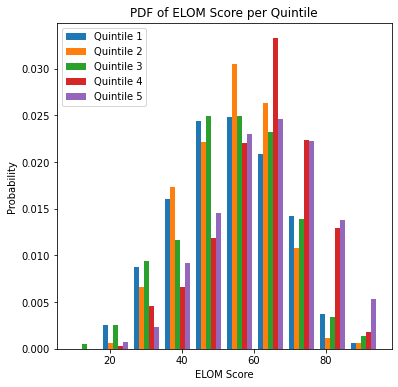

In [13]:
plt.figure(figsize=(6,6))
plt.hist([dfSocioEconomic.total[dfSocioEconomic.Quintile==1], dfSocioEconomic.total[dfSocioEconomic.Quintile==2], dfSocioEconomic.total[dfSocioEconomic.Quintile==3], dfSocioEconomic.total[dfSocioEconomic.Quintile==4], dfSocioEconomic.total[dfSocioEconomic.Quintile==5]], label=['Quintile 1', 'Quintile 2', 'Quintile 3', 'Quintile 4', 'Quintile 5'],density=True)
plt.legend(loc='upper left')
plt.title("PDF of ELOM Score per Quintile")
plt.xlabel('ELOM Score')
plt.ylabel('Probability')
plt.show()

We first look at the relationship between each quintile and ELOM score. It can be deduced from the probability density function above that the poorer quintiles have lower ELOM scores on average whereas the less poor quintiles have higher ELOM scores on average. This indicates that ELOM score and quintile have a positive correlation.

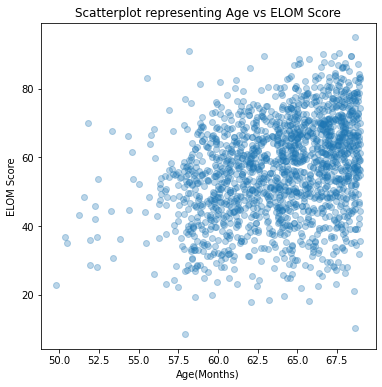

In [14]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot representing Age vs ELOM Score")
plt.ylabel('ELOM Score')
plt.xlabel('Age(Months)')
plt.scatter(df2019.Age,df2019.total,alpha=0.3)
plt.show()

We can see from the above graph that there is a weak positive correlation between Age and ELOM score.

In [15]:
df2019["HomeLanguage"].equals(df2019["AssesLanguage"])

True

Here we show that the HomeLanguage and AssessLanguage variables are exactly the same for every student and as such we will only look at HomeLanguage in the modelling phase.

In [16]:
dfLanguages = df2019[["HomeLanguage","total"]].groupby(["HomeLanguage"]).mean()
display(dfLanguages.sort_values(by='total'))

,total
HomeLanguage,
Setswana,55.223690
Afrikaans,56.210110
isiXhosa,56.830852
isiZulu,56.868176
English,63.568140


From the above table we can deduce that on average learners who are English speaking had a higher ELOM score than students who speak other languages. Setswana speaking students had the lowest ELOM score on average.

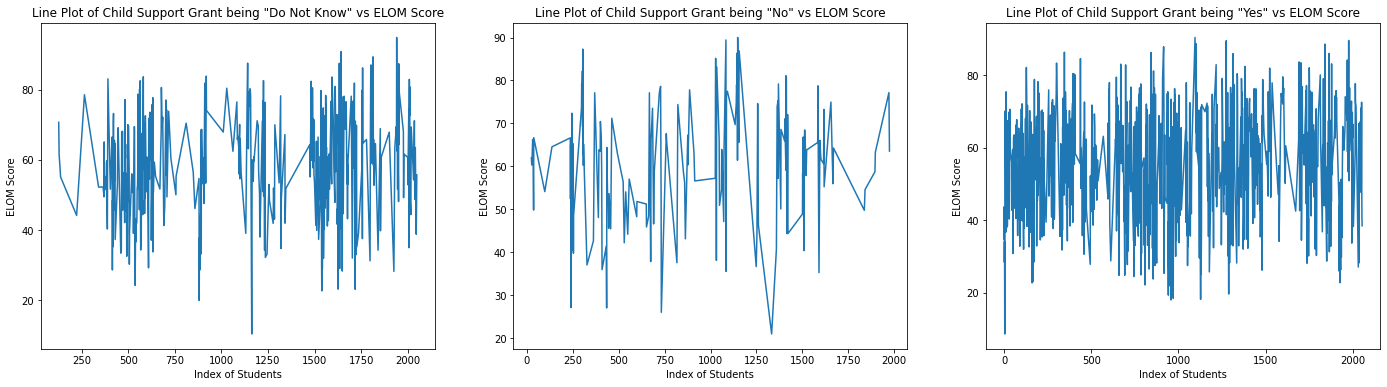

In [17]:
dfDontKnow = df2019[df2019.ChildSupportGrant=="Do Not Know"]
dfNo = df2019[df2019.ChildSupportGrant=="No"]
dfYes = df2019[df2019.ChildSupportGrant=="Yes"]

plt.figure(figsize=(24,6))
plt.subplot(131)
plt.title('Line Plot of Child Support Grant being "Do Not Know" vs ELOM Score')
plt.xlabel('Index of Students')
plt.ylabel('ELOM Score')
plt.plot(dfDontKnow.index,dfDontKnow.total)
plt.subplot(132)
plt.title('Line Plot of Child Support Grant being "No" vs ELOM Score')
plt.xlabel('Index of Students')
plt.ylabel('ELOM Score')
plt.plot(dfNo.index,dfNo.total)
plt.subplot(133)
plt.title('Line Plot of Child Support Grant being "Yes" vs ELOM Score')
plt.xlabel('Index of Students')
plt.ylabel('ELOM Score')
plt.plot(dfYes.index,dfYes.total)
plt.show()

From the above graphs we can conclude that there is no clear relationship between Child Support Grant and ELOM Score.

In [18]:
dfAgeGroup1 = df2019[df2019.AgeGroup == '50 to 59']
dfAgeGroup2 = df2019[df2019.AgeGroup == '60 to 69']
df1 = pd.DataFrame(dfAgeGroup1.groupby('Quintile').agg({'total':['mean']}))
df2 = pd.DataFrame(dfAgeGroup2.groupby('Quintile').agg({'total':['mean']}))
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Age 50 to 59 months')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Age 60 to 69 months')
space = "\xa0" * 10
display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_(), raw=True)

,total
,mean
Quintile,
1,45.778899
2,49.693421
3,46.400685
4,57.192500
5,59.052105
,total
,mean
Quintile,


Interpreting this we can infer that students that belong to less poor quintiles and fall into a higher age group have higher ELOM scores on average compared to other students.

### 2 - In the absence of the socio-economic factors, to what extent do the behavioural tendencies of a child influence ELOM score and whether or not the child is at risk?

Investigating the dataset we can determine that the behavioural tendencies of a student are highlighted by the following variables:
* ChildObs1                  
* ChildObs2                   
* ChildObs3                   
* ChildObs4                   
* ChildObs                    
* SelfCare                    
* SocialRelations             
* EmotionalReadiness
* Gender

ChildObs is the sum of ChildObs1,ChildObs2,ChildObs3 and ChildObs4. As such we will only consider ChildObs in the analysis and modelling phases.

In [19]:
display(Markdown("#### Correlation Matrix of Behavioural Factors and ELOM Score"))
dfBehavioural = df2019[['ChildObs', 'SelfCare','SocialRelations','EmotionalReadiness','Gender','total']]
display(dfBehavioural.corr())

#### Correlation Matrix of Behavioural Factors and ELOM Score

,ChildObs,SelfCare,SocialRelations,EmotionalReadiness,total
ChildObs,1.000000,0.136640,0.285232,0.373216,0.574458
SelfCare,0.136640,1.000000,0.201793,0.205488,0.170603
SocialRelations,0.285232,0.201793,1.000000,0.595601,0.265162
EmotionalReadiness,0.373216,0.205488,0.595601,1.000000,0.447987
total,0.574458,0.170603,0.265162,0.447987,1.000000


ChildObs has a strong correlation with the ELOM score according to the correlation matrix above, whereas the other dependent variables have a weak correlation with ELOM score. It is also important to note that SocialRelations has a strong correlation with EmotionalReadiness. This could be due to the fact that children who are more emotionally ready for school would also be more likely to try to form social relations/connections.

We will now be looking at how Gender influences ELOM score 

In [20]:
dfGender = df2019[["Gender","total"]].groupby(["Gender"]).mean()
display(dfGender.sort_values(by='total'))

,total
Gender,
Male,54.750473
Female,58.261693


We grouped the students based on their gender and calculated the respective average means. From this calculation it seems that female students have a higher average ELOM score relative to male students.

We now want to assess if there is any relationship between the behavioural tendencies of males vs females.

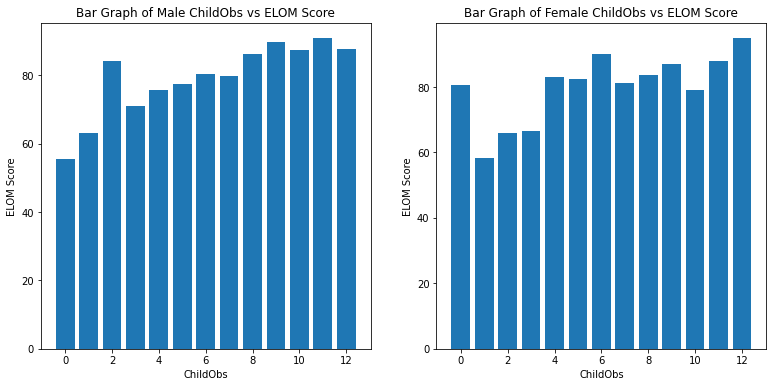

In [21]:
dfMaleObs = df2019[df2019.Gender=="Male"]
dfFemaleObs = df2019[df2019.Gender=="Female"]

plt.figure(figsize=(13,6))
plt.subplot(121)
plt.title('Bar Graph of Male ChildObs vs ELOM Score')
plt.xlabel('ChildObs')
plt.ylabel('ELOM Score')
plt.bar(dfMaleObs.ChildObs,dfMaleObs.total)
plt.subplot(122)
plt.title('Bar Graph of Female ChildObs vs ELOM Score')
plt.xlabel('ChildObs')
plt.ylabel('ELOM Score')
plt.bar(dfFemaleObs.ChildObs,dfFemaleObs.total)
plt.show()

We can see that on average female students, who achieved a total of 12 for their child observation total, had high ELOM scores relative to male students who also achieved a total of 12 for their child observation total. Both male and female students seem to have a linear increase in their ELOM score as their childObs total increases, however with female students there are some fluctuations.

### 3 - In conjunction with the socio-economic background of a child, do the behavioural tendencies of the child have an influence on the ELOM score?

In [22]:
dfCombined = df2019[['Quintile', 'Age','AgeGroup','HomeLanguage','ChildObs','SelfCare','SocialRelations','EmotionalReadiness','total']]

We have excluded Assess Language and ChildSupportGrant in this analysis due to our findings above highlighting that these 2 variables are not necessary for analysis. In the below analysis we will look at relationships between the socio-economic factors and different behavioural tendencies as we have already established the relationship between these factors and the ELOM Score.

In [23]:
dfQuintile = df2019[["Quintile","ChildObs"]].groupby(["Quintile"]).mean()
display(dfQuintile)

,ChildObs
Quintile,
1,6.962963
2,6.953608
3,6.430318
4,7.483384
5,7.913907


It is clear from above that on average less poor quintiles have a higher ChildObs score. This indicates that less poor quintiles have students who paid more attention, stayed concentrated, were careful and diligent, and more interested and curious.

We will now take a look at whether age and emotional readiness of a student are associated with one another.

In [24]:
dfER = df2019[["AgeGroup","EmotionalReadiness"]].groupby(["AgeGroup"]).mean()
display(dfER.iloc[:2])

,EmotionalReadiness
AgeGroup,
50 to 59,7.623656
60 to 69,8.241429


It is quite clear from the table above that students who belong to the higher age group are more emotionally ready for Grade 1 as opposed to students who belong to the lower age group

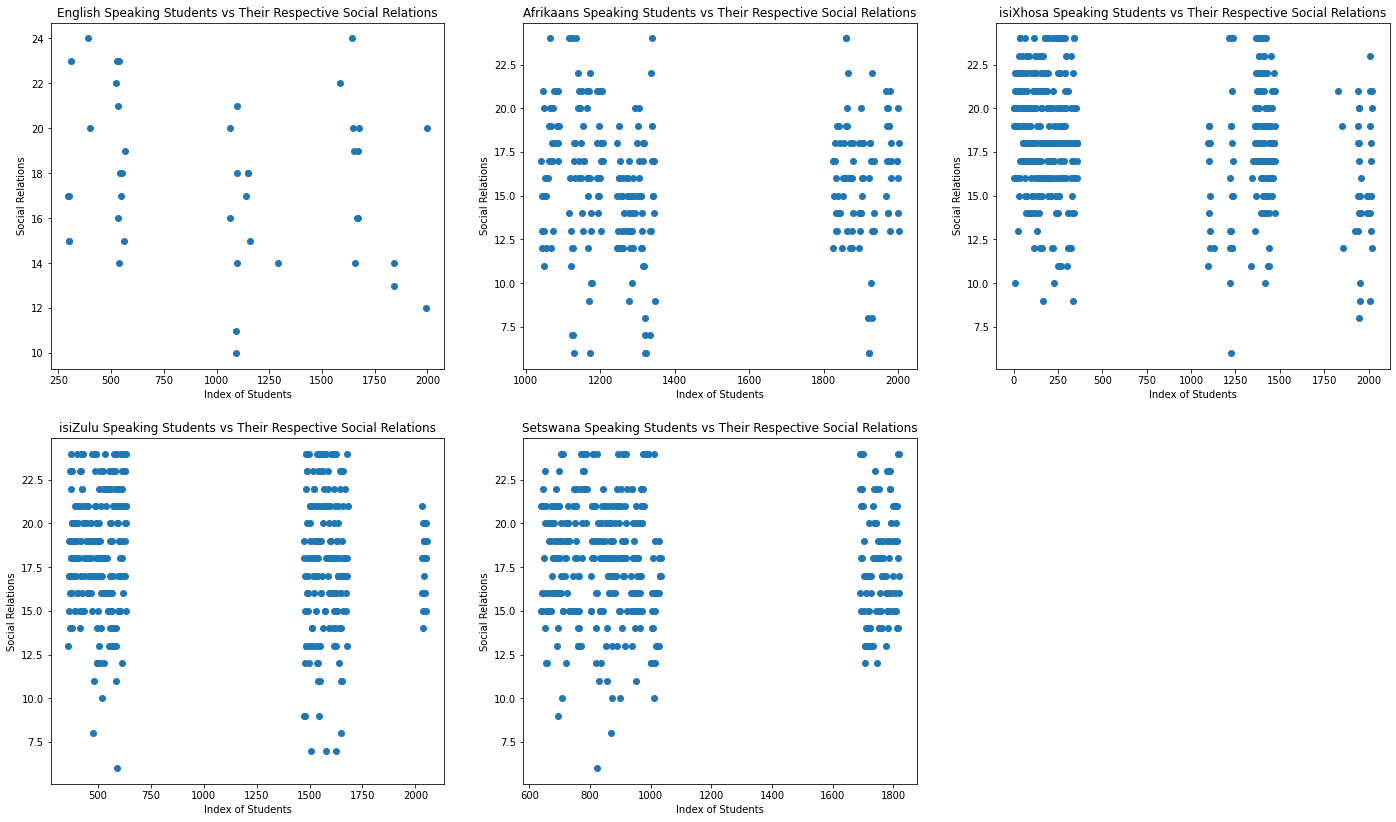

In [25]:
dfEnglish = dfCombined[dfCombined.HomeLanguage=="English"]
dfAfrikaans = dfCombined[dfCombined.HomeLanguage=="Afrikaans"]
dfisiXhosa = dfCombined[dfCombined.HomeLanguage=="isiXhosa"]
dfisiZulu = dfCombined[dfCombined.HomeLanguage=="isiZulu"]
dfSetswana = dfCombined[dfCombined.HomeLanguage=="Setswana"]

plt.figure(figsize=(24,14))
plt.subplot(231)
plt.title('English Speaking Students vs Their Respective Social Relations')
plt.xlabel('Index of Students')
plt.ylabel('Social Relations')
plt.scatter(dfEnglish.index,dfEnglish.SocialRelations)
plt.subplot(232)
plt.title('Afrikaans Speaking Students vs Their Respective Social Relations')
plt.xlabel('Index of Students')
plt.ylabel('Social Relations')
plt.scatter(dfAfrikaans.index,dfAfrikaans.SocialRelations)
plt.subplot(233)
plt.title('isiXhosa Speaking Students vs Their Respective Social Relations')
plt.xlabel('Index of Students')
plt.ylabel('Social Relations')
plt.scatter(dfisiXhosa.index,dfisiXhosa.SocialRelations)
plt.subplot(234)
plt.title('isiZulu Speaking Students vs Their Respective Social Relations')
plt.xlabel('Index of Students')
plt.ylabel('Social Relations')
plt.scatter(dfisiZulu.index,dfisiZulu.SocialRelations)
plt.subplot(235)
plt.title('Setswana Speaking Students vs Their Respective Social Relations')
plt.xlabel('Index of Students')
plt.ylabel('Social Relations')
plt.scatter(dfSetswana.index,dfSetswana.SocialRelations)
plt.show()

We have investigated the relationship between the various home languages of the students and whether or not it influenced their social relations score. It is clear from above that there is no clear relationship between Home Language and Social Relations score. We will calculate the mean of the Social Relations score per Home Language to further investigate this relationship.

In [26]:
dfHL = df2019[["HomeLanguage","SocialRelations"]].groupby(["HomeLanguage"]).mean()
display(dfHL)
print("Max Social Relations score is",df2019.SocialRelations.max())

,SocialRelations
HomeLanguage,
English,17.627907
Afrikaans,15.750000
Setswana,18.111617
isiZulu,18.355856
isiXhosa,18.054054


Max Social Relations score is 24


It is clear from above that the social relations score per home language is above average and all quite similar. This indicates that the language that a child speaks has no impact on their social relations score.

### 4 - Considering the 2016 dataset, to what extent do the socio-economic factors influence ELOM score and how does this compare to 2019?

Based on the above definition of socio-economic factors, these are the following variables which we established to be socio-economic factors from the 2016 dataset:

- Quintile
- Age
- Home Language
- Assess Language

Unlike the 2019 dataset, this dataset did not include the `ChildSupportGrant` variable

In [27]:
display(Markdown("#### Correlation Matrix of Socio-Economic Factors and ELOM Score"))
dfSocioEconomic2016 = df2016[['Quintile', 'Age','HomeLanguage','AssesLanguage','Total']]
display(dfSocioEconomic2016.corr())

#### Correlation Matrix of Socio-Economic Factors and ELOM Score

,Age,Total
Age,1.00000,0.28793
Total,0.28793,1.00000


We can see above that there is an extremely weak positive correlation between the variables  listed above. In order to visualise the individual relationships between the socio-economic variables we will plot graphs of these relationships.

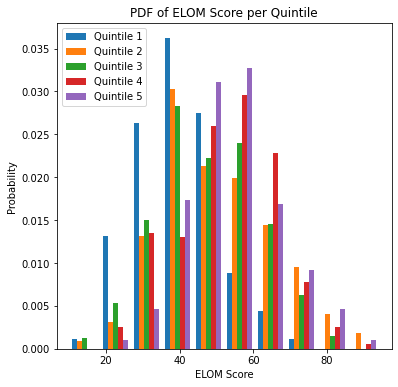

In [28]:
plt.figure(figsize=(6,6))
plt.hist([dfSocioEconomic2016.Total[dfSocioEconomic2016.Quintile==1], dfSocioEconomic2016.Total[dfSocioEconomic2016.Quintile==2], dfSocioEconomic2016.Total[dfSocioEconomic2016.Quintile==3], dfSocioEconomic2016.Total[dfSocioEconomic2016.Quintile==4], dfSocioEconomic2016.Total[dfSocioEconomic2016.Quintile==5]], label=['Quintile 1', 'Quintile 2', 'Quintile 3', 'Quintile 4', 'Quintile 5'],density=True)
plt.legend(loc='upper left')
plt.title("PDF of ELOM Score per Quintile")
plt.xlabel('ELOM Score')
plt.ylabel('Probability')
plt.show()

Based on the above figure, it is very clear that the poorer quintiles have lower ELOM scores on average, than the less poor quintiles.

In comparison to 2019, the 2016 results present a very similar positive relationship between these variables.

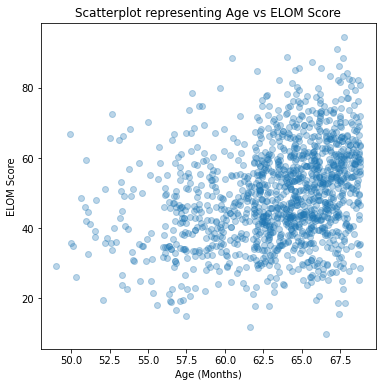

In [29]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot representing Age vs ELOM Score")
plt.ylabel('ELOM Score')
plt.xlabel('Age (Months)')
plt.scatter(df2016.Age,df2016.Total,alpha=0.3)
plt.show()

We can see from the above graph that there is a weak positive correlation between Age and ELOM score. This visual representation is logically sound due to it coinciding with the value of the correlation coefficient calculated above. This presents similar results to that of the 2019 dataset.

In [30]:
df2016["HomeLanguage"].equals(df2016["AssesLanguage"])

False

Here we can see that the HomeLanguage and AssessLanguage variables differ. We have chosen to exlude this variable from the model in order to remain consistent with the model for the 2019 dataset and allow for them to be directly compared.

In [31]:
dfHomeLanguage2016 = df2016[["HomeLanguage","Total"]].groupby(["HomeLanguage"]).mean().sort_values(by='Total')

dfAssessLanguage2016 = df2016[["AssesLanguage","Total"]].groupby(["AssesLanguage"]).mean().sort_values(by='Total')

df1_styler = dfHomeLanguage2016.style.set_table_attributes("style='display:inline'").set_caption('')
df2_styler = dfAssessLanguage2016.style.set_table_attributes("style='display:inline'").set_caption('')
space = "\xa0" * 10
display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_(), raw=True)

,Total
HomeLanguage,
Sesotho,40.868000
Setswana,43.725253
Afrikaans,48.059429
isiZulu,50.217526
English,54.511463
isiXhosa,55.941417
,Total
AssesLanguage,
Setswana,43.501477


From the above table we can deduce that on average learners who are isiXhosa speaking had a higher ELOM score than students who speak other languages. isiZulu speaking students had the lowest ELOM score on average.

This differs from the 2019 dataset which exhibited English speaking students with the highest average ELOM Score and Setswana speaking student with the lowest. 

In [32]:
dfAgeGroup1_2016 = df2016[df2016.AgeGroup == '49 to 59 Months']
dfAgeGroup2_2016 = df2016[df2016.AgeGroup == '60 to 69 Months']
df1 = pd.DataFrame(dfAgeGroup1_2016.groupby('Quintile').agg({'Total':['mean']}))
df2 = pd.DataFrame(dfAgeGroup2_2016.groupby('Quintile').agg({'Total':['mean']}))
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Age 40 to 59 months')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Age 60 to 69 months')
space = "\xa0" * 10
display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_(), raw=True)

,Total
,mean
Quintile,
1,37.462600
2,40.532353
3,41.912375
4,47.748983
5,50.505806
,Total
,mean
Quintile,


As seen in the 2019 dataset, students that belong to less poor quintiles have higher ELOM scores on average compared to other students , also applies to students in the 40 to 59 months age group for 2016. However, the inverse applies to students which fall in the 60 to 69 month age category.

In order to perform model fitting, hypothesis testing and interpretation of results for every question in a structured manner, we will look at each of these sections per question. A 5% significance level will be used throughout the model fitting and hypothesis testing stages.

## Model Fitting


### Methodology
We will initially take our full dataset and split the dataset into a training dataset and a testing dataset. The training dataset will allow us to determine the various outputs from least squares regression for the different subsets of our eventual final model. These outputs include the regression coefficients per variable in the model, the standard error for each variables regression coefficient and the students t-distribution value for the respective regression coefficients. These are just a subset of the outputs in the model. 

We will then perform model selection which will provide us with the best model in terms of which variables should be included in our model. Residual analysis will then be performed which will allow us to identify outliers in our data as well as determining if the regression coefficients for certain explanatory variables in our model are biased or not. Finally, depending on the results from residual analysis, we could possibly need to refit the model on the data. 

We will then finally fit a least squares regression on our test data. The outputs of this regression together with the outputs of the final training data regression will allow us to determine if those outputs are by chance, sampling variation, or if these outputs are statistically signficant.

We initially perform regression on each of the variables seperately with the dependent variable, ELOM score. We will look at which model produces the best $R^2$ which is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale (https://statisticsbyjim.com/regression/interpret-r-squared-regression/). Depending on which model produces the best $R^2$ value we will choose the variables associated with that model and add it to our final model. We stop this adding of variables when the $R^2$ value stops increasing when adding any of the variables not currently present in the model.

Before diving into the code to implement the methodology mentioned above we need to list our assumptions regarding our data and model to be.
* There is a linear relationship between the dependent variable(ELOM score) and the various independent variables in the model.
* Each data observation is independent of the other data observations.
* We assume Homoscedasticity for our residuals, meaning the variance of the residual is the same for any observation.
* Lastly we assume the residuals are normally distributed.

### 1 - Does the socio-economic background of a child influence their ELOM score and, if so, to what extent?

The model which will be constructed will contain only socio-economic variables from the 2019 dataset as well as our dependent variable - ELOM score of a student. The outputs from this model will allow us to make deductions as to whether the included socio-economic variables have an impact on the students ELOM score.


In [33]:
# Overview of the ELOM 2019 dataset before splitting
display(df2019.head())

,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,Height,ChildSupportGrant,ProgrammeYear,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1_0_3,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,59.311474,50 to 59,isiXhosa,isiXhosa,107.5,Yes,1 Year in Programme,2.91,2.07,0.00,0.00,4.980000,4.20,0.0,3.12,2.03,9.35,0.00,0.0,4.01,1.38,2.65,8.04,1.00,0.00,4.03,3.02,8.05,0.00,0.0,1.00,1.25,2.19,0.0,4.44,34.860001,Sometimes,Sometimes,Sometimes,Almost never,3,3,16,8
1,1_1_2,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.950821,50 to 59,isiXhosa,isiXhosa,99.0,Yes,1 Year in Programme,1.36,2.07,2.22,2.62,8.270001,3.11,0.0,0.00,3.41,6.52,0.00,0.0,4.01,2.80,1.00,7.81,3.11,2.68,2.11,1.26,9.16,3.21,0.0,3.41,3.17,2.19,0.0,11.98,43.740002,Sometimes,Sometimes,Sometimes,Sometimes,4,2,19,7
2,1_0_4,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,58.688526,50 to 59,isiXhosa,isiXhosa,108.4,Yes,1 Year in Programme,1.36,2.07,2.22,0.00,5.650000,4.20,0.0,3.12,3.41,10.73,0.00,0.0,2.47,1.38,1.00,4.85,0.00,0.00,0.00,1.26,1.26,0.00,0.0,2.47,1.25,2.19,0.0,5.91,28.400000,Sometimes,Sometimes,Often,Sometimes,5,3,20,10
3,1_1_10,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.491802,50 to 59,isiXhosa,isiXhosa,102.1,Yes,1 Year in Programme,1.36,2.07,2.22,0.00,5.650000,3.11,0.0,3.77,3.41,10.29,2.81,0.0,0.00,1.38,2.65,6.84,1.00,1.34,0.00,3.02,5.36,0.00,0.0,2.47,1.25,2.19,0.0,5.91,34.049999,Sometimes,Sometimes,Almost never,Sometimes,3,3,20,11
4,1_0_11,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,57.934425,50 to 59,isiXhosa,isiXhosa,101.5,Yes,1 Year in Programme,0.00,1.00,2.22,0.00,3.220000,0.00,0.0,0.00,2.75,2.75,0.00,0.0,0.00,1.38,0.00,1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.25,0.00,0.0,1.25,8.600000,Almost never,Almost never,Almost never,Almost always,3,3,10,2


In [34]:
train_numberQ1 = int(df2019.shape[0]*(80/100)) # Calculate number of training examples
dftempQ1 = df2019.sample(df2019.shape[0],replace=False,random_state=12)
dftempQ1 = dftempQ1.reset_index(drop=True)
df2019_trainQ1 = dftempQ1[:train_numberQ1]
df2019_testQ1 = dftempQ1[train_numberQ1:]
print("The training data has a shape of",df2019_trainQ1.shape)
print("The test data has a shape of",df2019_testQ1.shape)
display(df2019_trainQ1)

The training data has a shape of (1343, 53)
The test data has a shape of (336, 53)


,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,Height,ChildSupportGrant,ProgrammeYear,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1083_0_9,kzn,1083,Rural,Urban,4,Quintile 4 & 5,ilembe,Male,66.295082,60 to 69,isiZulu,isiZulu,106.0,Do Not Know,1 Year in Programme,2.91,2.07,3.69,0.00,8.67,3.11,4.58,3.77,3.95,15.410000,2.81,2.84,0.00,2.80,2.65,11.10,0.00,4.37,4.03,3.02,11.42,0.00,3.42,1.00,2.40,3.09,0.00,9.910000,56.509998,Often,Often,Often,Often,8,4,20,11
1,50_1_31,nw,50,Urban,Urban,3,Quintile 2 & 3,rustenburg,Female,60.786884,60 to 69,Setswana,Setswana,108.5,Yes,1 Year in Programme,2.91,1.00,2.22,2.62,8.75,4.20,0.00,3.12,2.75,10.070000,0.00,0.00,0.00,1.38,2.65,4.03,1.00,2.68,0.00,1.26,4.94,0.00,0.00,1.00,1.25,2.19,0.00,4.440000,32.230000,Often,Often,Sometimes,Sometimes,6,3,19,3
2,15_0_39,ec,15,Urban,Rural,4,Quintile 4 & 5,libode,Male,62.196720,60 to 69,isiXhosa,isiXhosa,105.4,Yes,1 Year in Programme,2.91,3.59,2.22,2.62,11.34,4.20,4.58,3.77,2.75,15.300000,6.03,0.00,2.47,2.80,2.65,13.95,1.00,6.72,4.03,3.02,14.77,3.21,3.42,2.47,2.40,3.09,0.00,14.590000,69.949997,Almost always,Almost always,Almost always,Almost always,12,4,24,12
3,469_1_5,ec,469,Rural,Rural,2,Quintile 2 & 3,libode,Female,61.934425,60 to 69,isiXhosa,isiXhosa,107.0,Yes,1 Year in Programme,2.91,1.00,2.22,0.00,6.13,4.20,4.58,3.77,4.51,17.059999,2.81,4.51,2.47,2.80,1.00,13.59,3.11,2.68,2.11,1.26,9.16,3.21,3.42,2.47,1.25,2.19,0.00,12.540000,58.480000,Often,Often,Sometimes,Almost never,5,3,12,4
4,19_0_1,ec,19,Rural,Rural,2,Quintile 2 & 3,libode,Male,62.065575,60 to 69,isiXhosa,isiXhosa,116.0,Yes,1 Year in Programme,1.36,2.07,3.69,2.62,9.74,4.20,4.58,4.74,5.33,18.850000,4.05,4.51,2.47,2.80,2.65,16.48,3.11,2.68,4.03,1.26,11.08,3.21,2.64,2.47,3.17,3.09,2.97,17.549999,73.699997,Almost always,Often,Almost always,Almost always,11,4,20,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1356_1_9,wc,1356,Rural,Urban,3,Quintile 2 & 3,overberg,Female,66.163933,60 to 69,Afrikaans,Afrikaans,111.4,Yes,1 Year in Programme,2.91,2.07,0.00,0.00,4.98,4.20,4.58,4.74,3.95,17.469999,4.05,4.51,0.00,2.80,2.65,14.01,3.11,2.68,2.11,3.02,10.92,3.21,0.00,2.47,2.40,3.09,0.00,11.170000,58.549999,Often,Almost always,Sometimes,Often,8,3,14,7
1339,6_1_13,ec,6,Urban,Rural,2,Quintile 2 & 3,libode,Female,66.721313,60 to 69,isiXhosa,isiXhosa,107.7,Yes,2 Years in Programme,2.91,3.59,3.69,0.00,10.19,4.20,4.58,4.74,3.95,17.469999,0.00,0.00,2.47,2.80,1.00,6.27,3.11,2.68,4.03,3.02,12.84,3.21,2.64,2.47,2.40,3.09,2.97,16.780001,63.549999,Almost always,Almost always,Almost always,Almost always,12,4,18,10
1340,20_0_7,ec,20,Urban,Rural,3,Quintile 2 & 3,mthata,Male,64.819672,60 to 69,isiXhosa,isiXhosa,115.7,Yes,1 Year in Programme,2.91,2.07,3.69,0.00,8.67,4.20,4.58,3.77,3.95,16.500000,0.00,0.00,2.47,2.80,2.65,7.92,3.11,1.34,0.00,3.02,7.47,0.00,0.00,2.47,1.25,3.09,2.97,9.780000,50.340000,Sometimes,Often,Sometimes,Sometimes,5,3,17,8
1341,3_0_2,ec,3,Urban,Rural,2,Quintile 2 & 3,mthata,Male,61.442623,60 to 69,isiXhosa,isiXhosa,123.4,Yes,1 Year in Programme,2.91,3.59,3.69,2.62,12.81,4.20,4.58,3.77,3.41,15.960000,2.81,0.00,2.47,2.80,2.65,10.73,3.11,2.68,4.03,3.02,12.84,0.00,2.64,2.47,2.40,3.09,0.00,10.600000,62.939999,Almost always,Almost always,Often,Often,10,4,20,10


From the above dataset, we will select the subset of variables that are socio-economic in nature. As mentioned previously, AssessLanguage is excluded from this model as it is equal to HomeLanguage. Adding AssessLanguage will be equivalent to adding HomeLanguage twice which will introduce a bias into our system.

AgeGroup will be used in the model as Age results in numerical problems with our regression models. Quintile will be used over CompositeQuintileGroup as it specifies the Quintile per student and not a combination of other Quintiles.

The following code ensures that every variable is either continuous or encoded:

In [35]:
df2019_trainQ1 = df2019_trainQ1[['Quintile','AgeGroup','HomeLanguage','ChildSupportGrant','total']]
df2019_testQ1 = df2019_testQ1[['Quintile','AgeGroup','HomeLanguage','ChildSupportGrant','total']]
df2019_HL = df2019_trainQ1.HomeLanguage
df2019_CSG = df2019_trainQ1.ChildSupportGrant

print(df2019.Quintile.value_counts()/df2019.shape[0])
print(df2019_trainQ1.Quintile.value_counts()/df2019_trainQ1.shape[0])
print(df2019_testQ1.Quintile.value_counts()/df2019_testQ1.shape[0])

1    0.353782
3    0.243597
4    0.197141
2    0.115545
5    0.089934
Name: Quintile, dtype: float64
1    0.354430
3    0.239017
4    0.198809
2    0.115413
5    0.092331
Name: Quintile, dtype: float64
1    0.351190
3    0.261905
4    0.190476
2    0.116071
5    0.080357
Name: Quintile, dtype: float64


In [36]:
LE = LabelEncoder()
df2019_trainQ1['Quintile'] = LE.fit_transform(df2019_trainQ1['Quintile'])
df2019_trainQ1['AgeGroup'] = LE.fit_transform(df2019_trainQ1['AgeGroup'])
df2019_testQ1['Quintile'] = LE.fit_transform(df2019_testQ1['Quintile'])
df2019_testQ1['AgeGroup'] = LE.fit_transform(df2019_testQ1['AgeGroup'])

In [37]:
df2019_trainQ1['ChildSupportGrant'] = df2019_trainQ1['ChildSupportGrant'].replace('Do Not Know', 'NA')
df2019_testQ1['ChildSupportGrant'] = df2019_testQ1['ChildSupportGrant'].replace('Do Not Know', 'NA')
df2019_trainQ1 = pd.get_dummies(df2019_trainQ1,drop_first=True)
df2019_testQ1 = pd.get_dummies(df2019_testQ1,drop_first=True)

In [38]:
df2019_trainQ1 = df2019_trainQ1.reset_index(drop=True)
display(df2019_trainQ1.head())

df2019_testQ1 = df2019_testQ1.reset_index(drop=True)
display(df2019_testQ1.head())

,Quintile,AgeGroup,total,HomeLanguage_Afrikaans,HomeLanguage_Setswana,HomeLanguage_isiZulu,HomeLanguage_isiXhosa,ChildSupportGrant_No,ChildSupportGrant_NA
0,3,1,56.509998,0,0,1,0,0,1
1,2,1,32.230000,0,1,0,0,0,0
2,3,1,69.949997,0,0,0,1,0,0
3,1,1,58.480000,0,0,0,1,0,0
4,1,1,73.699997,0,0,0,1,0,0


,Quintile,AgeGroup,total,HomeLanguage_Afrikaans,HomeLanguage_Setswana,HomeLanguage_isiZulu,HomeLanguage_isiXhosa,ChildSupportGrant_No,ChildSupportGrant_NA
0,0,1,71.199997,1,0,0,0,0,0
1,2,1,54.270000,0,1,0,0,0,0
2,0,1,46.500000,0,0,0,1,0,0
3,1,1,70.730003,0,0,0,1,0,0
4,3,1,46.930000,0,1,0,0,0,0


Quintile is an ordinal categorical variable so we label encode it so that it retains order in the variable. HomeLanguage and ChildSupportGrant are dummy encoded since they are nominal categorical variables. This allows us to use these variables in least squares regression.

In [39]:
fitQuintileQ1 = smf.ols(formula="total~Quintile",data=df2019_trainQ1).fit()
fitAgeQ1 = smf.ols(formula="total~AgeGroup",data=df2019_trainQ1).fit()
fitHomeLanguageQ1 = smf.ols(formula="total~HomeLanguage_Afrikaans+HomeLanguage_Setswana+HomeLanguage_isiZulu+HomeLanguage_isiXhosa",data=df2019_trainQ1).fit()
fitGrantQ1 = smf.ols(formula="total~ChildSupportGrant_No+ChildSupportGrant_NA",data=df2019_trainQ1).fit()

In [40]:
fitQuintileQ1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     80.40
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.00e-18
Time:                        14:02:07   Log-Likelihood:                -5461.9
No. Observations:                1343   AIC:                         1.093e+04
Df Residuals:                    1341   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.6050      0.582     90.420      0.000      51.464      53.746
Quintile       2.5046      0.279      8.966      0.000       1.957       3.053
==============================================================================
Omnibus:                       23.932   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.799
Skew:                          -0.224   Prob(JB):                     5.02e-05
Kurtosis:                       2.609   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
fitAgeQ1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     77.36
Date:                Thu, 27 May 2021   Prob (F-statistic):           4.28e-18
Time:                        14:02:07   Log-Likelihood:                -5463.3
No. Observations:                1343   AIC:                         1.093e+04
Df Residuals:                    1341   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.7735      0.961     50.772      0.000      46.889      50.658
AgeGroup       9.2277      1.049      8.796      0.000       7.170      11.286
==============================================================================
Omnibus:                       23.407   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.556
Skew:                          -0.204   Prob(JB):                     9.35e-05
Kurtosis:                       2.594   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
fitHomeLanguageQ1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.582
Date:                Thu, 27 May 2021   Prob (F-statistic):             0.0357
Time:                        14:02:07   Log-Likelihood:                -5495.8
No. Observations:                1343   AIC:                         1.100e+04
Df Residuals:                    1338   BIC:                         1.103e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 62.7839      2.419     25.955      0.000      58.038      67.529
HomeLanguage_Afrikaans    -6.8242      2.606     -2.619      0.009     -11.937      -1.712
HomeLanguage_Setswana     -7.4979      2.540     -2.952      0.003     -12.481      -2.514
HomeLanguage_isiZulu      -5.6499      2.540     -2.225      0.026     -10.632      -0.668
HomeLanguage_isiXhosa     -5.9947      2.531     -2.369      0.018     -10.959      -1.030
==============================================================================
Omnibus:                       27.951   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.425
Skew:                          -0.178   Prob(JB):                     6.05e-05
Kurtosis:                       2.530   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
fitGrantQ1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     10.48
Date:                Thu, 27 May 2021   Prob (F-statistic):           3.04e-05
Time:                        14:02:07   Log-Likelihood:                -5490.5
No. Observations:                1343   AIC:                         1.099e+04
Df Residuals:                    1340   BIC:                         1.100e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.0855      0.509    108.255      0.000      54.087      56.084
ChildSupportGrant_No     4.7628      1.307      3.644      0.000       2.199       7.327
ChildSupportGrant_NA     3.1234      0.889      3.514      0.000       1.380       4.867
==============================================================================
Omnibus:                       32.599   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.209
Skew:                          -0.194   Prob(JB):                     1.50e-05
Kurtosis:                       2.504   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
fitFinalQ1 = smf.ols(formula="total~Quintile+AgeGroup+HomeLanguage_Afrikaans+HomeLanguage_Setswana+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+ChildSupportGrant_No+ChildSupportGrant_NA",data=df2019_trainQ1).fit()

In [45]:
fitFinalQ1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     21.71
Date:                Thu, 27 May 2021   Prob (F-statistic):           2.78e-31
Time:                        14:02:07   Log-Likelihood:                -5418.8
No. Observations:                1343   AIC:                         1.086e+04
Df Residuals:                    1334   BIC:                         1.090e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 45.7405      2.663     17.174      0.000      40.516      50.965
Quintile                   2.2200      0.289      7.672      0.000       1.652       2.788
AgeGroup                   8.9923      1.031      8.720      0.000       6.969      11.015
HomeLanguage_Afrikaans    -1.8025      2.554     -0.706      0.480      -6.812       3.207
HomeLanguage_Setswana     -2.4469      2.482     -0.986      0.324      -7.316       2.422
HomeLanguage_isiZulu      -0.2033      2.474     -0.082      0.935      -5.057       4.650
HomeLanguage_isiXhosa      0.0371      2.496      0.015      0.988      -4.859       4.933
ChildSupportGrant_No       1.8729      1.293      1.448      0.148      -0.664       4.410
ChildSupportGrant_NA       1.8766      0.981      1.913      0.056      -0.048       3.801
==============================================================================
Omnibus:                       17.565   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.858
Skew:                          -0.215   Prob(JB):                     0.000360
Kurtosis:                       2.687   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residual Analysis

The final model which was calculated displayed skewness of -0.215 and kurtosis of 2.687. This indicated that the data is fairly symmetrical and indicates that the residuals are close to a normal distribution.

In [46]:
# Extracting residuals on our training set which will be used in the analysis below.
residualsQ1 = fitFinalQ1.resid

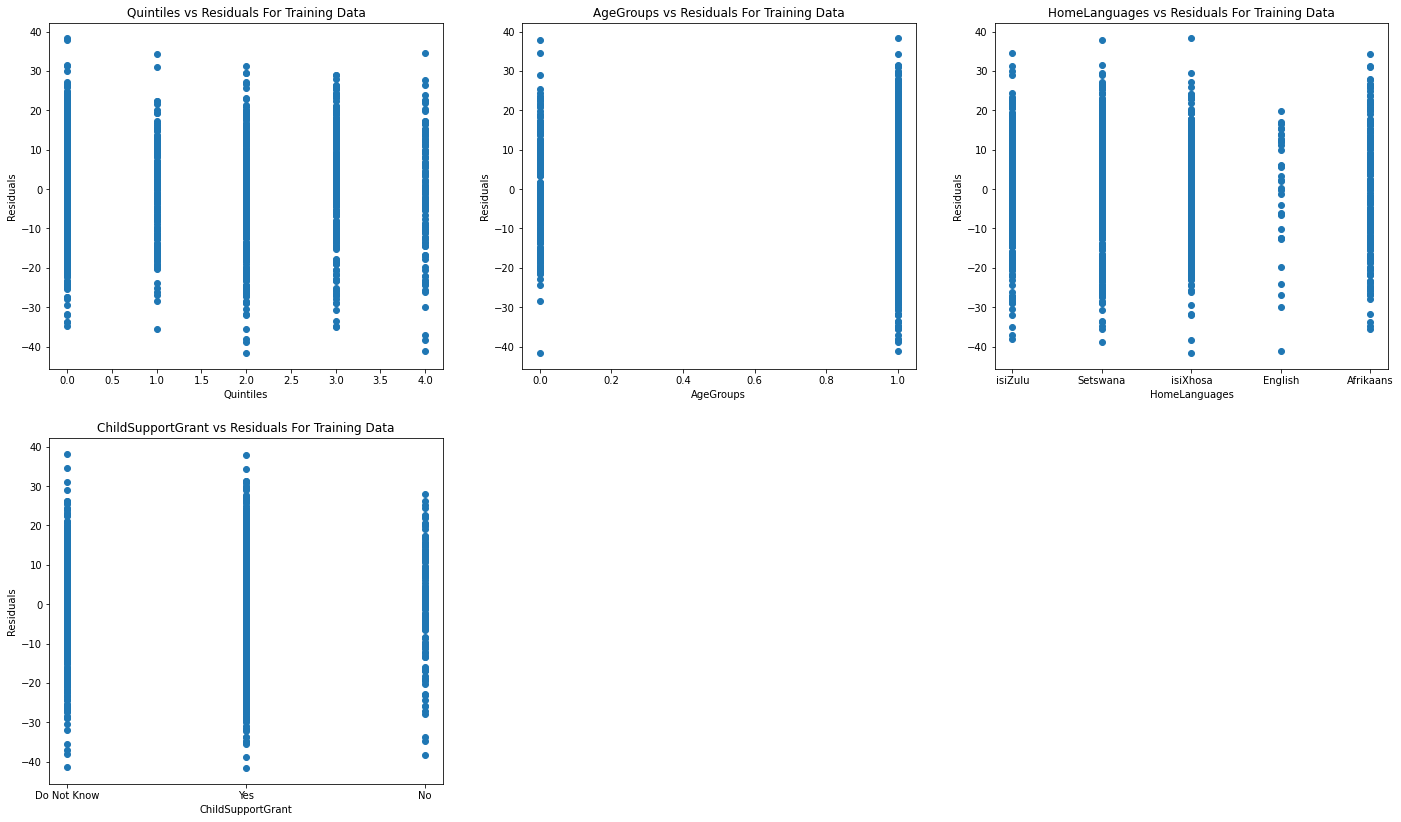

0       0.003059
1       0.003059
2       0.003059
3       0.003059
4       0.003059
          ...   
1338    0.033556
1339    0.034403
1340    0.035022
1341    0.037152
1342    0.037549
Name: hat_diag, Length: 1343, dtype: float64

In [47]:
# TODO: Plot residuals against dependent variables 
plt.figure(figsize=(24,14))
plt.subplot(231)
plt.title('Quintiles vs Residuals For Training Data')
plt.xlabel('Quintiles')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ1.Quintile,residualsQ1)
plt.subplot(232)
plt.title('AgeGroups vs Residuals For Training Data')
plt.xlabel('AgeGroups')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ1.AgeGroup,residualsQ1)
plt.subplot(233)
plt.title('HomeLanguages vs Residuals For Training Data')
plt.xlabel('HomeLanguages')
plt.ylabel('Residuals')
plt.scatter(df2019_HL,residualsQ1)
plt.subplot(234)
plt.title('ChildSupportGrant vs Residuals For Training Data')
plt.xlabel('ChildSupportGrant')
plt.ylabel('Residuals')
plt.scatter(df2019_CSG,residualsQ1)

plt.show()
## check for outliers
influence_points = fitFinalQ1.get_influence().summary_frame().sort_values(by='hat_diag')
influence_points = influence_points.reset_index(drop=True)
display(influence_points.hat_diag)

The above residual analysis was to determine if there is a relationship between the dependent variables in our model above and the residuals. We are able to deduce that there is no clear relationship between any of the explanatory variables and the residuals. Furthermore, we can conclude that the regression coefficients represented in the final model above are unbiased.

Secondly, we used the influence function provided by the statsmodels api in order to determine if there were any outliers in our training data that might have influenced our residuals. We extract the leverage values associated to each data point in our training dataset and sort the values from low leverage to high leverage, the result of this set of steps is the series in the above cell. We can deduce from the series above that there are no leverages for the data points that are abnormally higher than the other leverage values. This indicates that there are no real outliers in our dataset.

The two points highlighted above imply that the final model proposed above actually represents a good model for the question stated above.

In [48]:
fitTestQ1 = smf.ols(formula="total~Quintile+AgeGroup+HomeLanguage_Afrikaans+HomeLanguage_Setswana+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+ChildSupportGrant_No+ChildSupportGrant_NA",data=df2019_testQ1).fit()

In [49]:
fitTestQ1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     4.752
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.55e-05
Time:                        14:02:08   Log-Likelihood:                -1340.8
No. Observations:                 336   AIC:                             2700.
Df Residuals:                     327   BIC:                             2734.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 55.6294      5.555     10.015      0.000      44.702      66.557
Quintile                   0.8026      0.575      1.396      0.164      -0.328       1.933
AgeGroup                   8.0244      1.891      4.243      0.000       4.304      11.745
HomeLanguage_Afrikaans    -8.1113      5.469     -1.483      0.139     -18.869       2.647
HomeLanguage_Setswana     -9.8988      5.291     -1.871      0.062     -20.308       0.511
HomeLanguage_isiZulu      -9.3709      5.239     -1.789      0.075     -19.678       0.936
HomeLanguage_isiXhosa     -6.8354      5.336     -1.281      0.201     -17.332       3.661
ChildSupportGrant_No       6.8096      2.645      2.575      0.010       1.607      12.012
ChildSupportGrant_NA       3.1990      1.914      1.671      0.096      -0.566       6.964
==============================================================================
Omnibus:                        3.283   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.072
Skew:                          -0.230   Prob(JB):                        0.215
Kurtosis:                       3.088   Cond. No.                         37.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print(fitTestQ1.params)
print(fitFinalQ1.params)

Intercept                 55.629428
Quintile                   0.802593
AgeGroup                   8.024439
HomeLanguage_Afrikaans    -8.111300
HomeLanguage_Setswana     -9.898837
HomeLanguage_isiZulu      -9.370924
HomeLanguage_isiXhosa     -6.835405
ChildSupportGrant_No       6.809597
ChildSupportGrant_NA       3.198983
dtype: float64
Intercept                 45.740495
Quintile                   2.220017
AgeGroup                   8.992278
HomeLanguage_Afrikaans    -1.802486
HomeLanguage_Setswana     -2.446851
HomeLanguage_isiZulu      -0.203287
HomeLanguage_isiXhosa      0.037137
ChildSupportGrant_No       1.872941
ChildSupportGrant_NA       1.876621
dtype: float64


/////COMMENTS


### 2 - In the absence of the socio-economic factors, to what extent do the behavioural tendencies of a child influence ELOM score and whether or not the child is at risk?

The below model to be constructed, will contain only variables pertaining to the behavioural tendencies of a child as well as the dependent variable - ELOM score of a child. The outputs from this model will allow us to make deductions as to whether these behavioural tendencies of a child have an influence on a child's ELOM score, including the degree to which they impact ELOM score. 

In [51]:
np.random.seed(25)
train_numberQ2 = int(df2019.shape[0]*(80/100)) # calculate number of training examples
dftempQ2 = df2019.sample(df2019.shape[0],replace=False,random_state=25)
dftempQ2 = dftempQ2.reset_index(drop=True)
df2019_trainQ2 = dftempQ2[:train_numberQ2]
df2019_testQ2 = dftempQ2[train_numberQ2:]
print("The training data has a shape of",df2019_trainQ2.shape)
print("The test data has a shape of",df2019_testQ2.shape)

The training data has a shape of (1343, 53)
The test data has a shape of (336, 53)


In [52]:
df2019_trainQ2 = df2019_trainQ2[['ChildObs','SelfCare','SocialRelations', 'EmotionalReadiness', 'Gender','total']]
df2019_testQ2 = df2019_testQ2[['ChildObs','SelfCare','SocialRelations', 'EmotionalReadiness', 'Gender','total']]

The following code ensures that every variable is either continuous or encoded:

In [53]:
df2019_trainQ2['SelfCare'] = LE.fit_transform(df2019_trainQ2['SelfCare'])
df2019_testQ2['SelfCare'] = LE.fit_transform(df2019_testQ2['SelfCare'])

In [54]:
df2019_trainQ2 = pd.get_dummies(df2019_trainQ2 ,drop_first=True)
df2019_testQ2 = pd.get_dummies(df2019_testQ2,drop_first=True)

df2019_trainQ2  = df2019_trainQ2 .reset_index(drop=True)
display(df2019_trainQ2 .head())

df2019_testQ2 = df2019_testQ2.reset_index(drop=True)
display(df2019_testQ2.head())

,ChildObs,SelfCare,SocialRelations,EmotionalReadiness,total,Gender_Female
0,11,3,24,12,73.230003,1
1,12,3,24,12,68.779999,1
2,1,3,13,4,49.180000,0
3,11,3,24,12,64.769997,1
4,11,3,23,12,80.570000,1


,ChildObs,SelfCare,SocialRelations,EmotionalReadiness,total,Gender_Female
0,6,3,13,6,47.779999,1
1,11,3,23,12,72.639999,0
2,8,3,14,9,54.389999,1
3,5,3,12,6,64.309998,1
4,10,3,23,10,64.150002,1


The above training and testing datasets contain the variables needed for this specific model fitting, those being the behavioural tendency variables as well as ELOM score. As mentioned in the Exploratory Analyses phase, we only consider ChildObs as it is the sum of ChildObs1, ChildObs2, ChildObs3 and ChildObs4. 

Before we move on to the model fitting phase, we ensure that every variable is continuous or encoded.

SelfCare is an ordinal categorical variable which we label encode so that it retains its order. Gender is dummy encoded since it is a nominal categorical variable. These procedures will allow us to use these variables in least squares regression. 

In [55]:
fitChildObsQ2 = smf.ols(formula="total~ChildObs",data=df2019_trainQ2).fit()
fitSelfCareQ2 = smf.ols(formula="total~SelfCare",data=df2019_trainQ2).fit()
fitEmotionalReadinessQ2 = smf.ols(formula="total~EmotionalReadiness",data=df2019_trainQ2).fit()
fitSocialRelationsQ2 = smf.ols(formula="total~SocialRelations",data=df2019_trainQ2).fit()
fitGenderQ2 = smf.ols(formula="total~Gender_Female",data=df2019_trainQ2).fit()

In [56]:
fitChildObsQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     698.6
Date:                Thu, 27 May 2021   Prob (F-statistic):          2.91e-124
Time:                        14:02:08   Log-Likelihood:                -5224.9
No. Observations:                1343   AIC:                         1.045e+04
Df Residuals:                    1341   BIC:                         1.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.7812      0.772     48.954      0.000      36.267      39.295
ChildObs       2.6412      0.100     26.431      0.000       2.445       2.837
==============================================================================
Omnibus:                        2.884   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.875
Skew:                          -0.113   Prob(JB):                        0.238
Kurtosis:                       2.990   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
fitSelfCareQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     42.00
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.28e-10
Time:                        14:02:08   Log-Likelihood:                -5485.8
No. Observations:                1343   AIC:                         1.098e+04
Df Residuals:                    1341   BIC:                         1.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.2917      1.744     25.972      0.000      41.871      48.713
SelfCare       4.0863      0.631      6.481      0.000       2.849       5.323
==============================================================================
Omnibus:                       17.417   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.871
Skew:                          -0.165   Prob(JB):                     0.000973
Kurtosis:                       2.627   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
fitEmotionalReadinessQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 27 May 2021   Prob (F-statistic):           7.21e-67
Time:                        14:02:08   Log-Likelihood:                -5357.0
No. Observations:                1343   AIC:                         1.072e+04
Df Residuals:                    1341   BIC:                         1.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.7961      1.022     37.972      0.000      36.792      40.800
EmotionalReadiness     2.1682      0.119     18.286      0.000       1.936       2.401
==============================================================================
Omnibus:                        4.512   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.719
Skew:                          -0.019   Prob(JB):                        0.156
Kurtosis:                       2.745   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
fitSocialRelationsQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 27 May 2021   Prob (F-statistic):           7.21e-23
Time:                        14:02:09   Log-Likelihood:                -5457.9
No. Observations:                1343   AIC:                         1.092e+04
Df Residuals:                    1341   BIC:                         1.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          37.7558      1.889     19.985      0.000      34.050      41.462
SocialRelations     1.0492      0.105     10.027      0.000       0.844       1.254
==============================================================================
Omnibus:                       14.118   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.468
Skew:                          -0.108   Prob(JB):                      0.00533
Kurtosis:                       2.625   Cond. No.                         89.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
fitGenderQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     18.23
Date:                Thu, 27 May 2021   Prob (F-statistic):           2.09e-05
Time:                        14:02:09   Log-Likelihood:                -5497.4
No. Observations:                1343   AIC:                         1.100e+04
Df Residuals:                    1341   BIC:                         1.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.6529      0.553     98.761      0.000      53.567      55.739
Gender_Female     3.3835      0.792      4.270      0.000       1.829       4.938
==============================================================================
Omnibus:                       17.049   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.778
Skew:                          -0.138   Prob(JB):                      0.00168
Kurtosis:                       2.609   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the AIC (Akaike Information Criteria) statistic for model selection, we can see from the above models that all of the AIC values are very low indicated that all these models have a good fit i.e. each of these independent variables should be included in the final model. 

In [61]:
fitFinalQ2 = smf.ols(formula="total~SelfCare+ChildObs+EmotionalReadiness+SocialRelations+Gender_Female",data=df2019_trainQ2).fit()
fitFinalQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     185.9
Date:                Thu, 27 May 2021   Prob (F-statistic):          2.03e-150
Time:                        14:02:09   Log-Likelihood:                -5152.1
No. Observations:                1343   AIC:                         1.032e+04
Df Residuals:                    1337   BIC:                         1.035e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             29.8587      1.846     16.173      0.000      26.237      33.481
SelfCare               1.2110      0.509      2.378      0.018       0.212       2.210
ChildObs               2.1885      0.102     21.370      0.000       1.988       2.389
EmotionalReadiness     1.3973      0.132     10.551      0.000       1.138       1.657
SocialRelations       -0.2161      0.105     -2.056      0.040      -0.422      -0.010
Gender_Female          0.7605      0.622      1.222      0.222      -0.461       1.982
==============================================================================
Omnibus:                        1.802   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.865
Skew:                          -0.084   Prob(JB):                        0.394
Kurtosis:                       2.928   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The AIC value of the final model is even lower than the AIC values of the models that contain each variable against ELOM score. This indicates that this final model has a good-fit and fits this dataset quite well. 

#### Residual Analysis

The final model which was calculated displayed skewness of -0.084 and kurtosis of 2.928. This indicates that the data is fairly symmetrical and indicates that the residuals are close to a normal distribution.


With regards to distribution of the residuals, if we assume that the null hypothesis is that the residuals for this model are not normally distributed, the probabilities given by Omnibus and Jarque-Bera which are 1.802 and 1.865 respectively, indicates that we cannot reject the null hypothesis for a 5% significance level. Therefore we are 95% confident that these residuals are not normally distributed. 

In [62]:
#Extracting residuals on our training set 
residualsQ2 = fitFinalQ2.resid

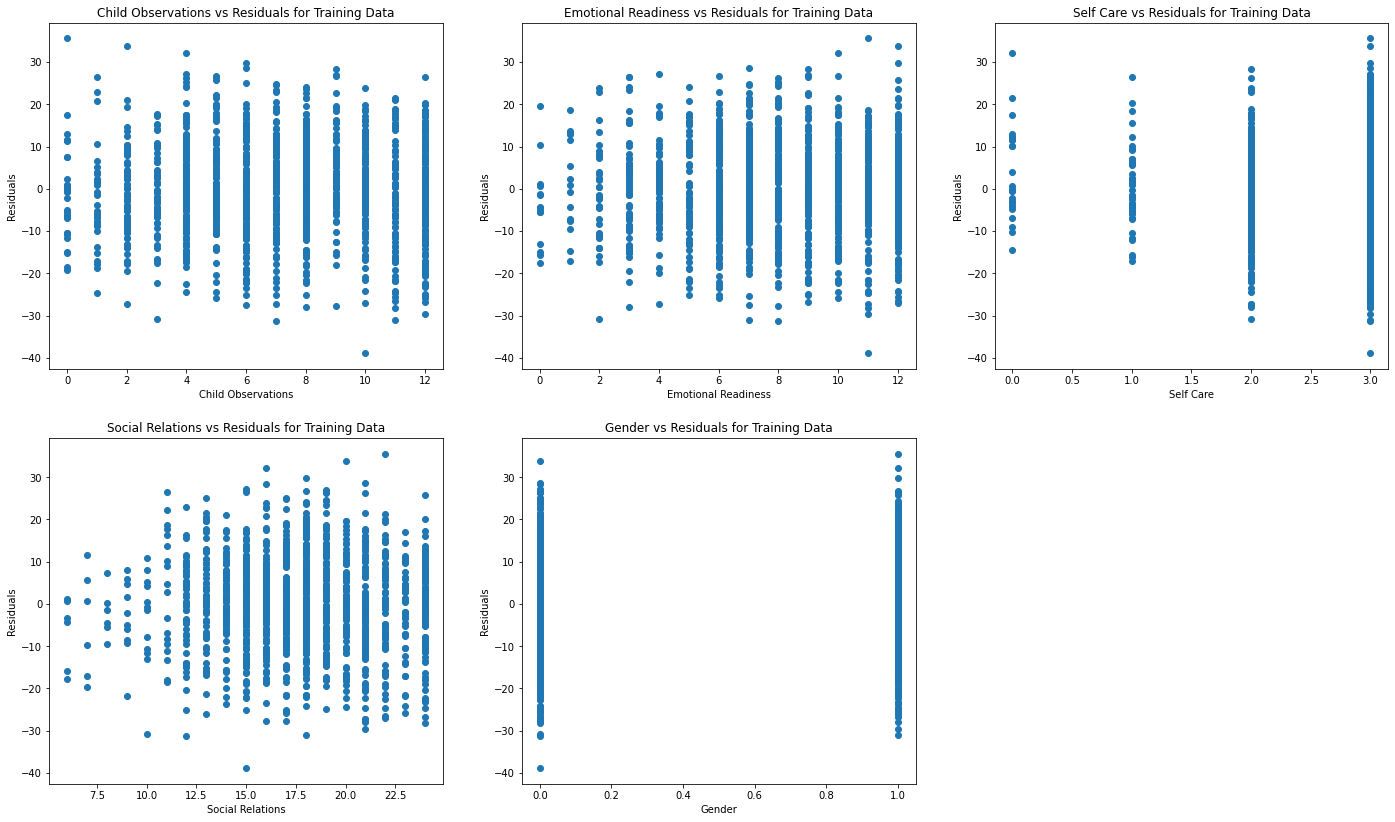

In [113]:
plt.figure(figsize=(24,14))
plt.subplot(231)
plt.title('Child Observations vs Residuals for Training Data')
plt.xlabel('Child Observations')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ2.ChildObs,residualsQ2)
plt.subplot(232)
plt.title('Emotional Readiness vs Residuals for Training Data')
plt.xlabel('Emotional Readiness')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ2.EmotionalReadiness,residualsQ2)
plt.subplot(233)
plt.title('Self Care vs Residuals for Training Data')
plt.xlabel('Self Care')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ2.SelfCare,residualsQ2)
plt.subplot(234)
plt.title('Social Relations vs Residuals for Training Data')
plt.xlabel('Social Relations')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ2.SocialRelations,residualsQ2)
plt.subplot(235)
plt.title('Gender vs Residuals for Training Data')
plt.xlabel('Gender')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ2.Gender_Female,residualsQ2)
plt.show()

The residual analysis above was to determine if there is a relationship between the dependent variables in our model above and the residuals, which is highlighted by the above scatterplots. We see that there is no clear relationship between any of the explanatory variables and the residuals which allow us to conclude that the regression coefficients represented in the final model are unbiased.

In [64]:
# Checking for outliers 
influence_pointsQ2 = fitFinalQ2.get_influence().summary_frame().sort_values(by='hat_diag')
influence_pointsQ2 = influence_pointsQ2.reset_index(drop=True)
display(influence_pointsQ2.hat_diag)

0       0.001679
1       0.001679
2       0.001679
3       0.001679
4       0.001713
          ...   
1338    0.019913
1339    0.020113
1340    0.021025
1341    0.021885
1342    0.025095
Name: hat_diag, Length: 1343, dtype: float64

Above we used the influence function provided by the statsmodels API in order to determine if there were any outliers in our training data that might have influenced our residuals. We extract the leverage values associated to each data point in our training dataset and sort the values from low leverage to high leverage, the result of this set of steps is the series in the above cell. We can deduce from the series above that there are no leverages for the data points that are abnormally higher than the other leverage values. This indicates that there are no real outliers in our dataset.

The residual analysis and the absence of outliers above, imply that the final model proposed above actually represents a good model for the question stated above.

We now finally fit the regression model against our test data and make comparisons between the training dataset outcomes and the test dataset outcomes.

In [65]:
fitTestQ2 = smf.ols(formula="total~SelfCare+ChildObs+EmotionalReadiness+SocialRelations+Gender_Female",data=df2019_testQ2).fit()
fitTestQ2 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     35.59
Date:                Thu, 27 May 2021   Prob (F-statistic):           4.19e-29
Time:                        14:02:10   Log-Likelihood:                -1279.9
No. Observations:                 336   AIC:                             2572.
Df Residuals:                     330   BIC:                             2595.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             31.0290      4.016      7.727      0.000      23.129      38.929
SelfCare               1.6874      1.066      1.582      0.115      -0.411       3.785
ChildObs               1.8355      0.223      8.227      0.000       1.397       2.274
EmotionalReadiness     1.4111      0.276      5.109      0.000       0.868       1.954
SocialRelations       -0.2117      0.205     -1.032      0.303      -0.615       0.192
Gender_Female          1.2950      1.224      1.058      0.291      -1.112       3.702
==============================================================================
Omnibus:                        1.459   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.340
Skew:                          -0.154   Prob(JB):                        0.512
Kurtosis:                       3.028   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
display(Markdown("##### Test Params"))
print(fitTestQ2.params)
display(Markdown("##### Train Params"))
print(fitFinalQ2.params)

##### Test Params

Intercept             31.028986
SelfCare               1.687358
ChildObs               1.835475
EmotionalReadiness     1.411127
SocialRelations       -0.211726
Gender_Female          1.294976
dtype: float64


##### Train Params

Intercept             29.858725
SelfCare               1.211006
ChildObs               2.188547
EmotionalReadiness     1.397338
SocialRelations       -0.216089
Gender_Female          0.760500
dtype: float64


- The training regression coefficients vs. the testing coefficients for SelfCare, ChildObs and Gender seem to differ quite a bit. This indicates that these variables are not statistically significant and the regression values could be determined by some chance, which could be as a result of sampling variation. We can deduce these variables do not have a string LINEAR relationship with ELOM score. 

- EmotionalReadiness however appears to have similar values for training and testing coefficients with a marginal differenced of approximately 0.2. However, the values are not close enough to infer that the EmotionalReadiness variable is statistically significant.  

- The value for the training and testing coefficients for SocialRelations are very similar. This indicates that the approximate value of -0.21 is statistically significant. 

### 3 - In conjunction with the socio-economic background of a child, do the behavioural tendencies of the child have an influence on the ELOM score?

This model will contain the socio-economic and behavioural variables from the 2019 ELOM dataset, with the exclusion of AssessLanguage and ChildSupportGrant as these variables were deemed unnecessary for analysis in the Exploratory Analysis section above. In addition, the model will contain the ELOM score of a student as the dependent variable. Using the outputs of the model in conjunction with the outputs from the hypothesis testing stage, we will be able to determine if the behavioural tendencies of a child, after factoring socio-economic factors, have an influence on the ELOM score of the child.

In [67]:
# Overview of the ELOM 2019 dataset before splitting
display(df2019.head())

,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,Height,ChildSupportGrant,ProgrammeYear,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1_0_3,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,59.311474,50 to 59,isiXhosa,isiXhosa,107.5,Yes,1 Year in Programme,2.91,2.07,0.00,0.00,4.980000,4.20,0.0,3.12,2.03,9.35,0.00,0.0,4.01,1.38,2.65,8.04,1.00,0.00,4.03,3.02,8.05,0.00,0.0,1.00,1.25,2.19,0.0,4.44,34.860001,Sometimes,Sometimes,Sometimes,Almost never,3,3,16,8
1,1_1_2,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.950821,50 to 59,isiXhosa,isiXhosa,99.0,Yes,1 Year in Programme,1.36,2.07,2.22,2.62,8.270001,3.11,0.0,0.00,3.41,6.52,0.00,0.0,4.01,2.80,1.00,7.81,3.11,2.68,2.11,1.26,9.16,3.21,0.0,3.41,3.17,2.19,0.0,11.98,43.740002,Sometimes,Sometimes,Sometimes,Sometimes,4,2,19,7
2,1_0_4,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,58.688526,50 to 59,isiXhosa,isiXhosa,108.4,Yes,1 Year in Programme,1.36,2.07,2.22,0.00,5.650000,4.20,0.0,3.12,3.41,10.73,0.00,0.0,2.47,1.38,1.00,4.85,0.00,0.00,0.00,1.26,1.26,0.00,0.0,2.47,1.25,2.19,0.0,5.91,28.400000,Sometimes,Sometimes,Often,Sometimes,5,3,20,10
3,1_1_10,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.491802,50 to 59,isiXhosa,isiXhosa,102.1,Yes,1 Year in Programme,1.36,2.07,2.22,0.00,5.650000,3.11,0.0,3.77,3.41,10.29,2.81,0.0,0.00,1.38,2.65,6.84,1.00,1.34,0.00,3.02,5.36,0.00,0.0,2.47,1.25,2.19,0.0,5.91,34.049999,Sometimes,Sometimes,Almost never,Sometimes,3,3,20,11
4,1_0_11,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,57.934425,50 to 59,isiXhosa,isiXhosa,101.5,Yes,1 Year in Programme,0.00,1.00,2.22,0.00,3.220000,0.00,0.0,0.00,2.75,2.75,0.00,0.0,0.00,1.38,0.00,1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.25,0.00,0.0,1.25,8.600000,Almost never,Almost never,Almost never,Almost always,3,3,10,2


In [68]:
train_numberQ3 = int(df2019.shape[0]*(80/100)) # Calculate number of training examples
dftempQ3 = df2019.sample(df2019.shape[0],replace=False,random_state=12)
dftempQ3 = dftempQ3.reset_index(drop=True)
df2019_trainQ3 = dftempQ3[:train_numberQ1]
df2019_testQ3 = dftempQ3[train_numberQ1:]
print("The training data has a shape of",df2019_trainQ3.shape)
print("The test data has a shape of",df2019_testQ3.shape)
display(df2019_trainQ3)

The training data has a shape of (1343, 53)
The test data has a shape of (336, 53)


,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,Height,ChildSupportGrant,ProgrammeYear,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1083_0_9,kzn,1083,Rural,Urban,4,Quintile 4 & 5,ilembe,Male,66.295082,60 to 69,isiZulu,isiZulu,106.0,Do Not Know,1 Year in Programme,2.91,2.07,3.69,0.00,8.67,3.11,4.58,3.77,3.95,15.410000,2.81,2.84,0.00,2.80,2.65,11.10,0.00,4.37,4.03,3.02,11.42,0.00,3.42,1.00,2.40,3.09,0.00,9.910000,56.509998,Often,Often,Often,Often,8,4,20,11
1,50_1_31,nw,50,Urban,Urban,3,Quintile 2 & 3,rustenburg,Female,60.786884,60 to 69,Setswana,Setswana,108.5,Yes,1 Year in Programme,2.91,1.00,2.22,2.62,8.75,4.20,0.00,3.12,2.75,10.070000,0.00,0.00,0.00,1.38,2.65,4.03,1.00,2.68,0.00,1.26,4.94,0.00,0.00,1.00,1.25,2.19,0.00,4.440000,32.230000,Often,Often,Sometimes,Sometimes,6,3,19,3
2,15_0_39,ec,15,Urban,Rural,4,Quintile 4 & 5,libode,Male,62.196720,60 to 69,isiXhosa,isiXhosa,105.4,Yes,1 Year in Programme,2.91,3.59,2.22,2.62,11.34,4.20,4.58,3.77,2.75,15.300000,6.03,0.00,2.47,2.80,2.65,13.95,1.00,6.72,4.03,3.02,14.77,3.21,3.42,2.47,2.40,3.09,0.00,14.590000,69.949997,Almost always,Almost always,Almost always,Almost always,12,4,24,12
3,469_1_5,ec,469,Rural,Rural,2,Quintile 2 & 3,libode,Female,61.934425,60 to 69,isiXhosa,isiXhosa,107.0,Yes,1 Year in Programme,2.91,1.00,2.22,0.00,6.13,4.20,4.58,3.77,4.51,17.059999,2.81,4.51,2.47,2.80,1.00,13.59,3.11,2.68,2.11,1.26,9.16,3.21,3.42,2.47,1.25,2.19,0.00,12.540000,58.480000,Often,Often,Sometimes,Almost never,5,3,12,4
4,19_0_1,ec,19,Rural,Rural,2,Quintile 2 & 3,libode,Male,62.065575,60 to 69,isiXhosa,isiXhosa,116.0,Yes,1 Year in Programme,1.36,2.07,3.69,2.62,9.74,4.20,4.58,4.74,5.33,18.850000,4.05,4.51,2.47,2.80,2.65,16.48,3.11,2.68,4.03,1.26,11.08,3.21,2.64,2.47,3.17,3.09,2.97,17.549999,73.699997,Almost always,Often,Almost always,Almost always,11,4,20,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1356_1_9,wc,1356,Rural,Urban,3,Quintile 2 & 3,overberg,Female,66.163933,60 to 69,Afrikaans,Afrikaans,111.4,Yes,1 Year in Programme,2.91,2.07,0.00,0.00,4.98,4.20,4.58,4.74,3.95,17.469999,4.05,4.51,0.00,2.80,2.65,14.01,3.11,2.68,2.11,3.02,10.92,3.21,0.00,2.47,2.40,3.09,0.00,11.170000,58.549999,Often,Almost always,Sometimes,Often,8,3,14,7
1339,6_1_13,ec,6,Urban,Rural,2,Quintile 2 & 3,libode,Female,66.721313,60 to 69,isiXhosa,isiXhosa,107.7,Yes,2 Years in Programme,2.91,3.59,3.69,0.00,10.19,4.20,4.58,4.74,3.95,17.469999,0.00,0.00,2.47,2.80,1.00,6.27,3.11,2.68,4.03,3.02,12.84,3.21,2.64,2.47,2.40,3.09,2.97,16.780001,63.549999,Almost always,Almost always,Almost always,Almost always,12,4,18,10
1340,20_0_7,ec,20,Urban,Rural,3,Quintile 2 & 3,mthata,Male,64.819672,60 to 69,isiXhosa,isiXhosa,115.7,Yes,1 Year in Programme,2.91,2.07,3.69,0.00,8.67,4.20,4.58,3.77,3.95,16.500000,0.00,0.00,2.47,2.80,2.65,7.92,3.11,1.34,0.00,3.02,7.47,0.00,0.00,2.47,1.25,3.09,2.97,9.780000,50.340000,Sometimes,Often,Sometimes,Sometimes,5,3,17,8
1341,3_0_2,ec,3,Urban,Rural,2,Quintile 2 & 3,mthata,Male,61.442623,60 to 69,isiXhosa,isiXhosa,123.4,Yes,1 Year in Programme,2.91,3.59,3.69,2.62,12.81,4.20,4.58,3.77,3.41,15.960000,2.81,0.00,2.47,2.80,2.65,10.73,3.11,2.68,4.03,3.02,12.84,0.00,2.64,2.47,2.40,3.09,0.00,10.600000,62.939999,Almost always,Almost always,Often,Often,10,4,20,10


For the above dataset, we will select the subset of variables that are both behavioural and socio-economic in nature. AgeGroup will be used in the model as Age results in numerical problems with our regression models. Quintile will be used over CompositeQuintileGroup as it specifies the Quintile per student and not a combination of other Quintiles.

We ensure that every variable required for the model is either continuous or encoded:

In [69]:
df2019_trainQ3 = df2019_trainQ3[['Quintile', 'Age','AgeGroup','HomeLanguage','ChildObs','SelfCare','SocialRelations','EmotionalReadiness','total']]
df2019_testQ3 = df2019_testQ3[['Quintile', 'Age','AgeGroup','HomeLanguage','ChildObs','SelfCare','SocialRelations','EmotionalReadiness','total']]
df2019_HLQ3 = df2019_trainQ3.HomeLanguage

print(df2019.Quintile.value_counts()/df2019.shape[0])
print(df2019_trainQ3.Quintile.value_counts()/df2019_trainQ3.shape[0])
print(df2019_testQ3.Quintile.value_counts()/df2019_testQ3.shape[0])

1    0.353782
3    0.243597
4    0.197141
2    0.115545
5    0.089934
Name: Quintile, dtype: float64
1    0.354430
3    0.239017
4    0.198809
2    0.115413
5    0.092331
Name: Quintile, dtype: float64
1    0.351190
3    0.261905
4    0.190476
2    0.116071
5    0.080357
Name: Quintile, dtype: float64


In [70]:
LE = LabelEncoder()
df2019_trainQ3['Quintile'] = LE.fit_transform(df2019_trainQ3['Quintile'])
df2019_trainQ3['AgeGroup'] = LE.fit_transform(df2019_trainQ3['AgeGroup'])
df2019_trainQ3['ChildObs'] = LE.fit_transform(df2019_trainQ3['ChildObs'])
df2019_trainQ3['SelfCare'] = LE.fit_transform(df2019_trainQ3['SelfCare'])
df2019_trainQ3['SocialRelations'] = LE.fit_transform(df2019_trainQ3['SocialRelations'])
df2019_trainQ3['EmotionalReadiness'] = LE.fit_transform(df2019_trainQ3['EmotionalReadiness'])

df2019_testQ3['Quintile'] = LE.fit_transform(df2019_testQ3['Quintile'])
df2019_testQ3['AgeGroup'] = LE.fit_transform(df2019_testQ3['AgeGroup'])
df2019_testQ3['ChildObs'] = LE.fit_transform(df2019_testQ3['ChildObs'])
df2019_testQ3['SelfCare'] = LE.fit_transform(df2019_testQ3['SelfCare'])
df2019_testQ3['SocialRelations'] = LE.fit_transform(df2019_testQ3['SocialRelations'])
df2019_testQ3['EmotionalReadiness'] = LE.fit_transform(df2019_testQ3['EmotionalReadiness'])

In [71]:
df2019_trainQ3 = pd.get_dummies(df2019_trainQ3,drop_first=True)
df2019_testQ3 = pd.get_dummies(df2019_testQ3,drop_first=True)

In [72]:
df2019_trainQ3 = df2019_trainQ3.reset_index(drop=True)
display(df2019_trainQ3.head())

df2019_testQ3 = df2019_testQ3.reset_index(drop=True)
display(df2019_testQ3.head())

,Quintile,Age,AgeGroup,ChildObs,SelfCare,SocialRelations,EmotionalReadiness,total,HomeLanguage_Afrikaans,HomeLanguage_Setswana,HomeLanguage_isiZulu,HomeLanguage_isiXhosa
0,3,66.295082,1,8,3,14,11,56.509998,0,0,1,0
1,2,60.786884,1,6,2,13,3,32.230000,0,1,0,0
2,3,62.196720,1,12,3,18,12,69.949997,0,0,0,1
3,1,61.934425,1,5,2,6,4,58.480000,0,0,0,1
4,1,62.065575,1,11,3,14,12,73.699997,0,0,0,1


,Quintile,Age,AgeGroup,ChildObs,SelfCare,SocialRelations,EmotionalReadiness,total,HomeLanguage_Afrikaans,HomeLanguage_Setswana,HomeLanguage_isiZulu,HomeLanguage_isiXhosa
0,0,65.442619,1,10,3,11,6,71.199997,1,0,0,0
1,2,63.672131,1,4,3,15,11,54.270000,0,1,0,0
2,0,68.557381,1,4,3,5,1,46.500000,0,0,0,1
3,1,67.868851,1,6,3,13,10,70.730003,0,0,0,1
4,3,63.606556,1,4,3,13,8,46.930000,0,1,0,0


Quintile is an ordinal categorical variable so we label encode it so that it retains order in the variable.
Since HomeLanguage was a nominal categorical we dummy encoded so that we can use this variable in least squares regression.

We will now perform Model Selection in order to select the best possible model with the above subset of the 2019 ELOM dataset.

In [73]:
fitQuintileQ3 = smf.ols(formula="total~Quintile",data=df2019_trainQ3).fit()
fitAgeQ3 = smf.ols(formula="total~AgeGroup",data=df2019_trainQ3).fit()
fitHomeLanguageQ3 = smf.ols(formula="total~HomeLanguage_Afrikaans+HomeLanguage_Setswana+HomeLanguage_isiZulu+HomeLanguage_isiXhosa",data=df2019_trainQ3).fit()
fitChildObsQ3 = smf.ols(formula="total~ChildObs",data=df2019_trainQ3).fit()
fitSocialRelationsQ3 = smf.ols(formula="total~SocialRelations",data=df2019_trainQ3).fit()
fitEmotionalReadinessQ3 = smf.ols(formula="total~EmotionalReadiness",data=df2019_trainQ3).fit()

In [74]:
fitQuintileQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     80.40
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.00e-18
Time:                        14:02:10   Log-Likelihood:                -5461.9
No. Observations:                1343   AIC:                         1.093e+04
Df Residuals:                    1341   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.6050      0.582     90.420      0.000      51.464      53.746
Quintile       2.5046      0.279      8.966      0.000       1.957       3.053
==============================================================================
Omnibus:                       23.932   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.799
Skew:                          -0.224   Prob(JB):                     5.02e-05
Kurtosis:                       2.609   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
fitAgeQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     77.36
Date:                Thu, 27 May 2021   Prob (F-statistic):           4.28e-18
Time:                        14:02:10   Log-Likelihood:                -5463.3
No. Observations:                1343   AIC:                         1.093e+04
Df Residuals:                    1341   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.7735      0.961     50.772      0.000      46.889      50.658
AgeGroup       9.2277      1.049      8.796      0.000       7.170      11.286
==============================================================================
Omnibus:                       23.407   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.556
Skew:                          -0.204   Prob(JB):                     9.35e-05
Kurtosis:                       2.594   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
fitHomeLanguageQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.582
Date:                Thu, 27 May 2021   Prob (F-statistic):             0.0357
Time:                        14:02:10   Log-Likelihood:                -5495.8
No. Observations:                1343   AIC:                         1.100e+04
Df Residuals:                    1338   BIC:                         1.103e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 62.7839      2.419     25.955      0.000      58.038      67.529
HomeLanguage_Afrikaans    -6.8242      2.606     -2.619      0.009     -11.937      -1.712
HomeLanguage_Setswana     -7.4979      2.540     -2.952      0.003     -12.481      -2.514
HomeLanguage_isiZulu      -5.6499      2.540     -2.225      0.026     -10.632      -0.668
HomeLanguage_isiXhosa     -5.9947      2.531     -2.369      0.018     -10.959      -1.030
==============================================================================
Omnibus:                       27.951   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.425
Skew:                          -0.178   Prob(JB):                     6.05e-05
Kurtosis:                       2.530   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
fitChildObsQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     676.5
Date:                Thu, 27 May 2021   Prob (F-statistic):          4.31e-121
Time:                        14:02:10   Log-Likelihood:                -5226.7
No. Observations:                1343   AIC:                         1.046e+04
Df Residuals:                    1341   BIC:                         1.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8575      0.787     48.114      0.000      36.314      39.401
ChildObs       2.6481      0.102     26.010      0.000       2.448       2.848
==============================================================================
Omnibus:                        8.139   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.179
Skew:                          -0.177   Prob(JB):                       0.0167
Kurtosis:                       2.854   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
fitSocialRelationsQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.27e-25
Time:                        14:02:10   Log-Likelihood:                -5446.1
No. Observations:                1343   AIC:                         1.090e+04
Df Residuals:                    1341   BIC:                         1.091e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.4980      1.276     34.080      0.000      40.994      46.002
SocialRelations     1.1014      0.103     10.683      0.000       0.899       1.304
==============================================================================
Omnibus:                       27.712   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.290
Skew:                          -0.126   Prob(JB):                     0.000176
Kurtosis:                       2.505   Cond. No.                         41.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
fitEmotionalReadinessQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     362.1
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.15e-71
Time:                        14:02:10   Log-Likelihood:                -5340.4
No. Observations:                1343   AIC:                         1.068e+04
Df Residuals:                    1341   BIC:                         1.070e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.1565      1.027     37.160      0.000      36.142      40.171
EmotionalReadiness     2.2525      0.118     19.030      0.000       2.020       2.485
==============================================================================
Omnibus:                       10.106   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.398
Skew:                          -0.055   Prob(JB):                       0.0248
Kurtosis:                       2.654   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the AIC (Akaike Information Criteria) statistic for model selection, we can see from the above models that all of the AIC values are very low indicated that all these models have a good fit i.e. each of these independent variables should be included in the final model. 

In [80]:
fitFinalQ3 = smf.ols(formula="total~Quintile+AgeGroup+HomeLanguage_Afrikaans+HomeLanguage_Setswana+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+ChildObs+SocialRelations+EmotionalReadiness",data=df2019_trainQ3).fit()

In [81]:
fitFinalQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     126.2
Date:                Thu, 27 May 2021   Prob (F-statistic):          1.95e-171
Time:                        14:02:10   Log-Likelihood:                -5087.2
No. Observations:                1343   AIC:                         1.019e+04
Df Residuals:                    1333   BIC:                         1.025e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 24.7026      2.280     10.836      0.000      20.230      29.175
Quintile                   1.7704      0.221      8.023      0.000       1.338       2.203
AgeGroup                   5.9442      0.813      7.312      0.000       4.349       7.539
HomeLanguage_Afrikaans    -0.9713      1.986     -0.489      0.625      -4.867       2.924
HomeLanguage_Setswana     -0.1837      1.931     -0.095      0.924      -3.971       3.604
HomeLanguage_isiZulu      -1.2735      1.934     -0.659      0.510      -5.067       2.520
HomeLanguage_isiXhosa      0.7974      1.938      0.411      0.681      -3.005       4.600
ChildObs                   2.1105      0.103     20.555      0.000       1.909       2.312
SocialRelations           -0.1123      0.101     -1.112      0.266      -0.310       0.086
EmotionalReadiness         1.3305      0.128     10.430      0.000       1.080       1.581
==============================================================================
Omnibus:                        6.897   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.993
Skew:                          -0.174   Prob(JB):                       0.0303
Kurtosis:                       2.933   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The AIC value of the final model is even lower than the AIC values of the models that contain each variable against ELOM score. This indicates that this final model has a good-fit and fits this dataset quite well. 

We will now perform residual analysis on the model in order to visualise the residuals that result from our model.
#### Residual Analysis

For the final model, the skewness and kurtosis are -0.174 and 2.933, respectively. This indicates that the residuals are close to a normal distribution.

If we assume that the null hypothesis is that our residuals are not normally distributed, the probabilities given by Omnibus and Jarque-Bera which are 0.032 and 0.0303 respectively indicates that we reject the null hypothesis for a 5% significance level. Therefore we are 95% confident that our residuals are normally distributed.

In [82]:
# Extracting residuals on our training set which will be used in the analysis below.
residualsQ3 = fitFinalQ3.resid

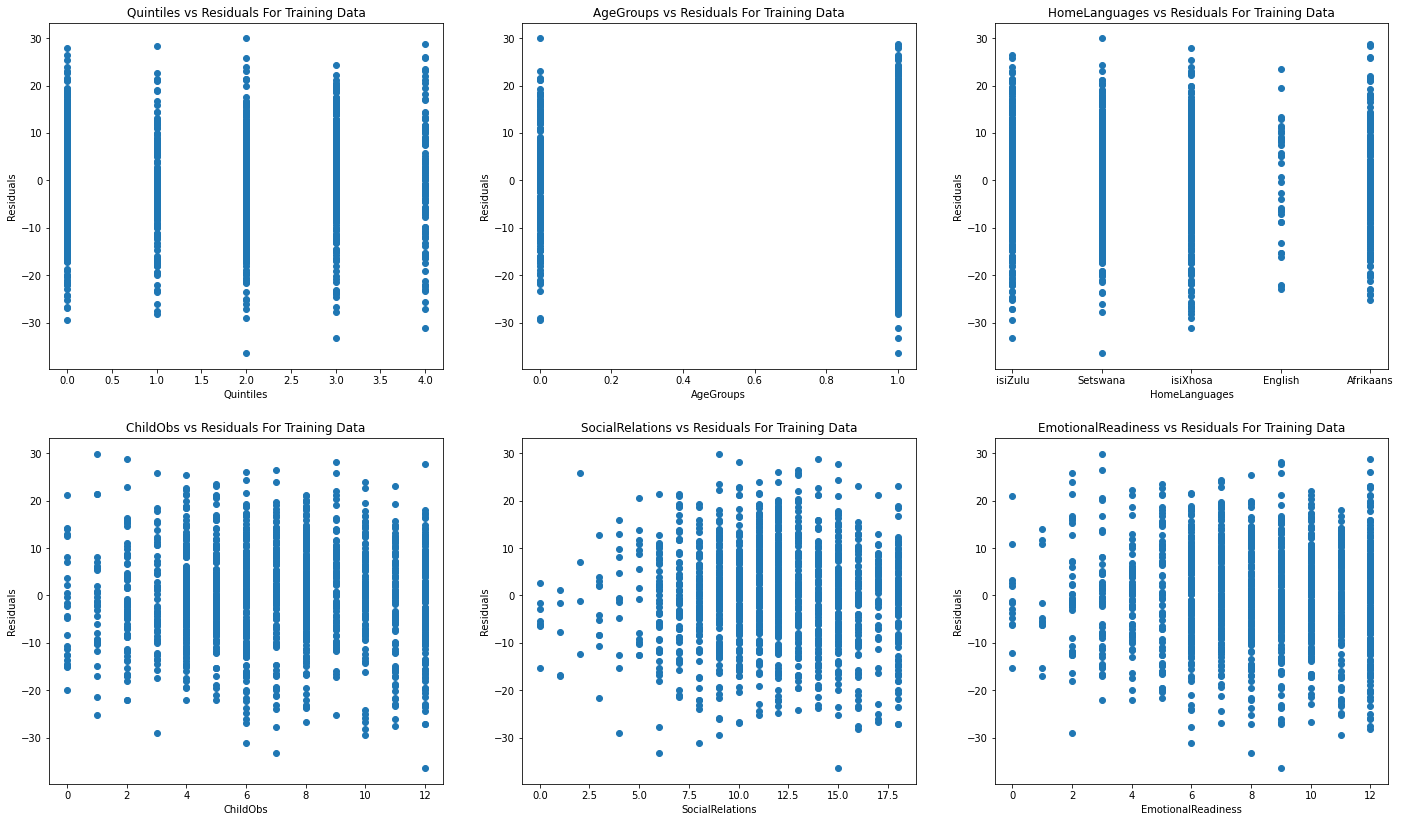

#### Check for Outliers

0       0.002977
1       0.002983
2       0.003048
3       0.003123
4       0.003127
          ...   
1338    0.034005
1339    0.034660
1340    0.034721
1341    0.034731
1342    0.034784
Name: hat_diag, Length: 1343, dtype: float64

In [83]:
# TODO: Plot residuals against dependent variables 
plt.figure(figsize=(24,14))
plt.subplot(231)
plt.title('Quintiles vs Residuals For Training Data')
plt.xlabel('Quintiles')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ3.Quintile,residualsQ3)
plt.subplot(232)
plt.title('AgeGroups vs Residuals For Training Data')
plt.xlabel('AgeGroups')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ3.AgeGroup,residualsQ3)
plt.subplot(233)
plt.title('HomeLanguages vs Residuals For Training Data')
plt.xlabel('HomeLanguages')
plt.ylabel('Residuals')
plt.scatter(df2019_HLQ3,residualsQ3)
plt.subplot(234)
plt.title('ChildObs vs Residuals For Training Data')
plt.xlabel('ChildObs')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ3.ChildObs,residualsQ3)
plt.subplot(235)
plt.title('SocialRelations vs Residuals For Training Data')
plt.xlabel('SocialRelations')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ3.SocialRelations,residualsQ3)
plt.subplot(236)
plt.title('EmotionalReadiness vs Residuals For Training Data')
plt.xlabel('EmotionalReadiness')
plt.ylabel('Residuals')
plt.scatter(df2019_trainQ3.EmotionalReadiness,residualsQ3)
plt.show()

## check for outliers
display(Markdown("#### Check for Outliers"))
influence_pointsQ3 = fitFinalQ3.get_influence().summary_frame().sort_values(by='hat_diag')
influence_pointsQ3 = influence_pointsQ3.reset_index(drop=True)
display(influence_pointsQ3.hat_diag)

The above residual analysis was to determine if there is a relationship between the dependent variables in our model above and the residuals, which is highlighted by the above scatterplots. Here we see that there is no clear relationship between any of the explanatory variables and the residuals which allow us to conclude that the regression coefficients represented in the final model above are unbiased.

We secondly used the influence function provided by the statsmodels API in order to determine if there were any outliers in our training data that might have influenced our residuals. We extract the leverage values associated to each data point in our training dataset and sort the values from low leverage to high leverage, the result of this set of steps is the series in the above cell. We can deduce from the series above that there are no leverages for the data points that are abnormally higher than the other leverage values. This indicates that there are no real outliers in our dataset.

The two points highlighted above imply that the final model proposed above actually represents a good model for the question stated above.

We now finally fit the regression model against our test data and make comparisons between the training dataset outcomes and the test dataset outcomes.

In [84]:
fitTestQ3 = smf.ols(formula="total~Quintile+AgeGroup+HomeLanguage_Afrikaans+HomeLanguage_Setswana+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+ChildObs+SocialRelations+EmotionalReadiness",data=df2019_testQ3).fit()

In [85]:
fitTestQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     26.91
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.23e-34
Time:                        14:02:11   Log-Likelihood:                -1266.0
No. Observations:                 336   AIC:                             2552.
Df Residuals:                     326   BIC:                             2590.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 33.5755      4.800      6.995      0.000      24.133      43.018
Quintile                   1.1086      0.444      2.495      0.013       0.235       1.983
AgeGroup                   6.8748      1.526      4.506      0.000       3.874       9.876
HomeLanguage_Afrikaans    -4.7117      4.369     -1.079      0.282     -13.306       3.883
HomeLanguage_Setswana     -4.6440      4.288     -1.083      0.280     -13.079       3.791
HomeLanguage_isiZulu      -6.6195      4.242     -1.561      0.120     -14.964       1.725
HomeLanguage_isiXhosa     -3.7115      4.303     -0.863      0.389     -12.176       4.753
ChildObs                   2.0863      0.196     10.648      0.000       1.701       2.472
SocialRelations           -0.4286      0.217     -1.975      0.049      -0.856      -0.002
EmotionalReadiness         1.2899      0.261      4.939      0.000       0.776       1.804
==============================================================================
Omnibus:                        2.870   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.925
Skew:                           0.090   Prob(JB):                        0.232
Kurtosis:                       3.420   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
display(Markdown("##### Test Params"))
print(fitTestQ3.params)
display(Markdown("##### Train Params"))
print(fitFinalQ3.params)

##### Test Params

Intercept                 33.575527
Quintile                   1.108589
AgeGroup                   6.874840
HomeLanguage_Afrikaans    -4.711719
HomeLanguage_Setswana     -4.644035
HomeLanguage_isiZulu      -6.619496
HomeLanguage_isiXhosa     -3.711478
ChildObs                   2.086344
SocialRelations           -0.428616
EmotionalReadiness         1.289865
dtype: float64


##### Train Params

Intercept                 24.702646
Quintile                   1.770402
AgeGroup                   5.944198
HomeLanguage_Afrikaans    -0.971280
HomeLanguage_Setswana     -0.183737
HomeLanguage_isiZulu      -1.273479
HomeLanguage_isiXhosa      0.797437
ChildObs                   2.110541
SocialRelations           -0.112281
EmotionalReadiness         1.330455
dtype: float64


Above we have fitted the model against the test data and printed the regression coefficients for both the training and test models.
The following important notes can be extracted from the above regression coefficients.

* ChildObs seems to have a similar values for both the training and testing model indicating that the approximate value of 2.1 is statistically significant for the regression coefficient relating to ChildObs. This value indicates that a 2.1 change in ChildObs results in a unit change relating to ELOM score.
* Similarly, EmotionalReadiness has similar values for both training and testing models of approximately 1.3, indicating that this is statistically significant as well.
* HomeLanguage for each Home Language seems to differ quite a lot between the training regression coefficients and the testing regression coefficients. This indicates that this variable isn't statistically significant and the regression values could be determined by some chance. This could be a result of sampling variation and that this variable doesn't have a strong LINEAR relationship with ELOM score.
* The regression coefficients relating to Quintile and SocialRelations, respectively, have a slight difference in the training and testing dataset. However, they are close enough to infer that the Quintile and SocialRelations variables are statistically significant. 

### 4 - Considering the 2016 dataset, to what extent do the socio-economic factors influence ELOM score and how does this compare to 2019?

Our model that we will construct in order to gain statistically correct inferences will contain only socio-economic variables from the 2016 ELOM dataset as well as our dependent variable which is the ELOM score of a student. In order to successfully answer the question above, we will finally use the outputs of our final model from this stage along with outputs from the hypothesis testing stage in order to make deductions on whether the socio-economic factors from 2016 differed from 2019's outputs.

In [87]:
# lets look at the full ELOM 2016 dataset before splitting
display(df2016.head())

,csid,Province,School,RuralOrUrban,Quintile,CompositeQuintileGroup,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,Height,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,Total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObsTotal
0,110913EGL,KwaZulu Natal,Bridgeman Primary,Rural,2,Q2 and Q3,Male,53.475410,49 to 59 Months,isiZulu,isiZulu,106.0,2.91,0.00,0.00,0.00,2.91,0.00,0.00,3.12,2.75,5.87,2.81,0.00,2.47,2.80,1.00,9.08,1.00,0.00,4.03,3.02,8.05,3.21,3.42,3.41,2.40,2.19,0.00,14.63,40.54,Sometimes,Often,Almost always,Almost always,9
1,110731UAE,KwaZulu Natal,Bridgeman Primary,Rural,2,Q2 and Q3,Male,54.918033,49 to 59 Months,isiZulu,isiZulu,104.7,2.91,2.07,2.22,2.62,9.82,4.20,0.00,4.74,1.00,9.94,0.00,0.00,2.47,1.38,2.65,6.50,3.11,0.00,0.00,0.00,3.11,0.00,0.00,0.00,2.40,2.19,2.97,7.56,36.93,Almost never,Sometimes,Almost never,Sometimes,2
2,110321UFN,KwaZulu Natal,Bridgeman Primary,Rural,2,Q2 and Q3,Female,59.245902,49 to 59 Months,isiZulu,isiZulu,105.3,2.91,2.07,0.00,0.00,4.98,4.20,4.58,4.74,3.41,16.93,2.81,0.00,2.47,1.38,2.65,9.31,3.11,4.37,2.11,1.26,10.85,3.21,3.42,2.47,2.40,3.09,0.00,14.59,56.66,Almost always,Often,Almost always,Almost always,11
3,110628SDB,KwaZulu Natal,Masuku Primary,Urban,2,Q2 and Q3,Female,56.000000,49 to 59 Months,isiZulu,isiZulu,104.1,1.36,3.59,2.22,0.00,7.17,3.11,0.00,3.12,2.75,8.98,0.00,2.84,0.00,1.38,1.00,5.22,0.00,0.00,2.11,1.26,3.37,0.00,2.64,1.00,1.25,2.19,0.00,7.08,31.82,Often,Often,Almost never,Sometimes,5
4,110320BBG,KwaZulu Natal,Masuku Primary,Urban,2,Q2 and Q3,Female,59.278689,49 to 59 Months,isiZulu,isiZulu,109.3,2.91,2.07,0.00,0.00,4.98,3.11,0.00,3.12,2.03,8.26,0.00,0.00,2.47,2.80,2.65,7.92,3.11,1.34,2.11,1.26,7.82,0.00,2.64,2.47,2.40,2.19,0.00,9.70,38.68,Often,Often,Often,Sometimes,7


In [88]:
train_number = int(df2016.shape[0]*(80/100)) # calculate number of training examples
dftemp = df2016.sample(df2016.shape[0],replace=False,random_state=12)
dftemp = dftemp.reset_index(drop=True)
df2016_train = dftemp[:train_number]
df2016_test = dftemp[train_number:]
print("The training data has a shape of",df2016_train.shape)
print("The test data has a shape of",df2016_test.shape)

The training data has a shape of (1055, 46)
The test data has a shape of (264, 46)


The above dataset contains all the variables that influence ELOM score, we will select the subset of variables that are socio-economic in nature. Remember from above that AssessLanguage is not selected in this model as for each observation in the full data, AssessLanguage is equal to HomeLanguage. Adding AssessLanguage will be equivalent to adding HomeLanguage twice which will introduce a bias into our system.
AgeGroup will be used in the model as Age results in numerical problems with our regression models. Quintile will be used over CompositeQuintileGroup as it specifies the Quintile per student and not a combination of other Quintiles.

Before we move to the Model Selection stage of Model Fitting we need to make sure every variable is either continuous or encoded.

In [89]:
df2016_train = df2016_train[['Quintile','AgeGroup','HomeLanguage','Total']]
df2016_test = df2016_test[['Quintile','AgeGroup','HomeLanguage','Total']]
df2016_HL = df2016_train.HomeLanguage

print(df2016.Quintile.value_counts()/df2016.shape[0])
print(df2016_train.Quintile.value_counts()/df2016_train.shape[0])
print(df2016_test.Quintile.value_counts()/df2016_test.shape[0])

3    0.370735
2    0.198635
5    0.175891
4    0.172858
1    0.081880
Name: Quintile, dtype: float64
3    0.371564
2    0.198104
4    0.178199
5    0.171564
1    0.080569
Name: Quintile, dtype: float64
3    0.367424
2    0.200758
5    0.193182
4    0.151515
1    0.087121
Name: Quintile, dtype: float64


In [90]:
LE = LabelEncoder()
df2016_train['Quintile'] = LE.fit_transform(df2016_train['Quintile'])
df2016_train['AgeGroup'] = LE.fit_transform(df2016_train['AgeGroup'])
df2016_test['Quintile'] = LE.fit_transform(df2016_test['Quintile'])
df2016_test['AgeGroup'] = LE.fit_transform(df2016_test['AgeGroup'])

In [91]:
df2016_train = pd.get_dummies(df2016_train,drop_first=True)
df2016_test = pd.get_dummies(df2016_test,drop_first=True)

In [92]:
df2016_train = df2016_train.reset_index(drop=True)
display(df2016_train.head())

df2016_test = df2016_test.reset_index(drop=True)
display(df2016_test.head())

,Quintile,AgeGroup,Total,HomeLanguage_Afrikaans,HomeLanguage_isiZulu,HomeLanguage_isiXhosa,HomeLanguage_Sesotho,HomeLanguage_Setswana
0,1,0,42.82,0,0,0,0,1
1,3,1,57.52,0,1,0,0,0
2,3,1,61.20,0,1,0,0,0
3,2,0,53.59,0,1,0,0,0
4,2,1,40.24,1,0,0,0,0


,Quintile,AgeGroup,Total,HomeLanguage_Afrikaans,HomeLanguage_isiZulu,HomeLanguage_isiXhosa,HomeLanguage_Sesotho,HomeLanguage_Setswana
0,4,1,47.63,0,0,1,0,0
1,4,1,47.43,0,0,0,0,0
2,0,0,30.84,0,0,0,0,1
3,4,0,45.43,0,1,0,0,0
4,2,1,40.35,0,0,0,0,1


Quintile is an ordinal categorical variable so we label encode it so that it retains order in the variable.
Since HomeLanguage was a nominal categorical we dummy encoded so that we can use this variable in least squares regression.

We will now perform Model Selection in order to select the best possible model with the above subset of the 2016 ELOM dataset.

In [93]:
fitQuintile = smf.ols(formula="Total~Quintile",data=df2016_train).fit()
fitAge = smf.ols(formula="Total~AgeGroup",data=df2016_train).fit()
fitHomeLanguage = smf.ols(formula="Total~HomeLanguage_Afrikaans+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+HomeLanguage_Sesotho+HomeLanguage_Setswana",data=df2016_train).fit()

In [94]:
fitQuintile.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     51.94
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.09e-12
Time:                        14:02:12   Log-Likelihood:                -4240.4
No. Observations:                1055   AIC:                             8485.
Df Residuals:                    1053   BIC:                             8495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8406      0.875     50.122      0.000      42.124      45.557
Quintile       2.5663      0.356      7.207      0.000       1.868       3.265
==============================================================================
Omnibus:                       12.731   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.886
Skew:                           0.256   Prob(JB):                      0.00159
Kurtosis:                       2.822   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
fitAge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     47.62
Date:                Thu, 27 May 2021   Prob (F-statistic):           8.90e-12
Time:                        14:02:12   Log-Likelihood:                -4242.4
No. Observations:                1055   AIC:                             8489.
Df Residuals:                    1053   BIC:                             8499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.5629      0.941     46.287      0.000      41.716      45.410
AgeGroup       7.2400      1.049      6.901      0.000       5.181       9.299
==============================================================================
Omnibus:                        9.146   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.062
Skew:                           0.204   Prob(JB):                       0.0108
Kurtosis:                       2.801   Cond. No.                         4.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
fitHomeLanguage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     22.05
Date:                Thu, 27 May 2021   Prob (F-statistic):           4.74e-21
Time:                        14:02:12   Log-Likelihood:                -4213.1
No. Observations:                1055   AIC:                             8438.
Df Residuals:                    1049   BIC:                             8468.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.6366      1.187     45.195      0.000      51.308      55.965
HomeLanguage_Afrikaans    -5.6736      1.685     -3.367      0.001      -8.981      -2.367
HomeLanguage_isiZulu      -3.3799      1.398     -2.418      0.016      -6.122      -0.638
HomeLanguage_isiXhosa      1.5964      1.530      1.044      0.297      -1.405       4.598
HomeLanguage_Sesotho     -13.6516      2.680     -5.094      0.000     -18.911      -8.393
HomeLanguage_Setswana     -9.4116      1.426     -6.599      0.000     -12.210      -6.613
==============================================================================
Omnibus:                        9.013   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.225
Skew:                           0.166   Prob(JB):                       0.0164
Kurtosis:                       2.724   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From here we can see that the model with the highest $R^2$ value is model 3 which includes the HomeLanguages as a variable, so we add HomeLanguage to our final model. We then look at combinations of HomeLanguage with Quintile and Age respectively.

In [97]:
fitComb1 = smf.ols(formula="Total~Quintile+HomeLanguage_Afrikaans+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+HomeLanguage_Sesotho+HomeLanguage_Setswana",data=df2016_train).fit()
fitComb2 = smf.ols(formula="Total~AgeGroup+HomeLanguage_Afrikaans+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+HomeLanguage_Sesotho+HomeLanguage_Setswana",data=df2016_train).fit()

In [98]:
fitComb1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     22.29
Date:                Thu, 27 May 2021   Prob (F-statistic):           8.41e-25
Time:                        14:02:12   Log-Likelihood:                -4202.4
No. Observations:                1055   AIC:                             8419.
Df Residuals:                    1048   BIC:                             8454.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 47.4285      1.784     26.580      0.000      43.927      50.930
Quintile                   1.8311      0.396      4.624      0.000       1.054       2.608
HomeLanguage_Afrikaans    -3.5667      1.730     -2.061      0.040      -6.962      -0.172
HomeLanguage_isiZulu      -1.5597      1.439     -1.084      0.279      -4.384       1.264
HomeLanguage_isiXhosa      4.1028      1.609      2.550      0.011       0.945       7.260
HomeLanguage_Sesotho     -10.3123      2.751     -3.749      0.000     -15.710      -4.914
HomeLanguage_Setswana     -5.9007      1.604     -3.680      0.000      -9.047      -2.754
==============================================================================
Omnibus:                       10.145   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.479
Skew:                           0.190   Prob(JB):                      0.00874
Kurtosis:                       2.732   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
fitComb2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     25.06
Date:                Thu, 27 May 2021   Prob (F-statistic):           6.94e-28
Time:                        14:02:12   Log-Likelihood:                -4195.1
No. Observations:                1055   AIC:                             8404.
Df Residuals:                    1048   BIC:                             8439.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 47.4098      1.558     30.427      0.000      44.352      50.467
AgeGroup                   6.6025      1.094      6.033      0.000       4.455       8.750
HomeLanguage_Afrikaans    -6.0494      1.659     -3.647      0.000      -9.304      -2.795
HomeLanguage_isiZulu      -1.2226      1.420     -0.861      0.390      -4.010       1.564
HomeLanguage_isiXhosa      1.2562      1.506      0.834      0.404      -1.698       4.210
HomeLanguage_Sesotho     -12.7068      2.641     -4.812      0.000     -17.888      -7.525
HomeLanguage_Setswana     -8.1188      1.419     -5.722      0.000     -10.903      -5.335
==============================================================================
Omnibus:                        8.615   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.410
Skew:                           0.190   Prob(JB):                       0.0149
Kurtosis:                       2.784   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see that the best model from the above 2 models is the latter one. The $R^2$ value indicates that the combination of AgeGroup and HomeLanguage has a stronger relationship with ELOM score relative to the combination of Quintile and HomeLanguage. 

In [100]:
fitFinal = smf.ols(formula="Total~Quintile+AgeGroup+HomeLanguage_Afrikaans+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+HomeLanguage_Sesotho+HomeLanguage_Setswana",data=df2016_train).fit()

In [101]:
fitFinal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     24.46
Date:                Thu, 27 May 2021   Prob (F-statistic):           5.28e-31
Time:                        14:02:12   Log-Likelihood:                -4185.9
No. Observations:                1055   AIC:                             8388.
Df Residuals:                    1047   BIC:                             8427.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 42.0253      1.991     21.108      0.000      38.119      45.932
Quintile                   1.6769      0.391      4.290      0.000       0.910       2.444
AgeGroup                   6.2837      1.088      5.775      0.000       4.149       8.419
HomeLanguage_Afrikaans    -4.1018      1.707     -2.403      0.016      -7.451      -0.753
HomeLanguage_isiZulu       0.3401      1.455      0.234      0.815      -2.515       3.195
HomeLanguage_isiXhosa      3.5679      1.587      2.248      0.025       0.453       6.683
HomeLanguage_Sesotho      -9.6944      2.712     -3.575      0.000     -15.015      -4.374
HomeLanguage_Setswana     -4.9660      1.588     -3.128      0.002      -8.081      -1.851
==============================================================================
Omnibus:                        9.444   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.251
Skew:                           0.202   Prob(JB):                      0.00980
Kurtosis:                       2.783   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A combination of all three dependent variables, namely Quintile,AgeGroup and HomeLanguage together with ELOM score in a model produces an $R^2$ value of 0.170 which is the highest from all the models. This indicates that all 3 variables together with ELOM score, the dependent variable, is the best model when looking at only the socio-economic variables in the full dataset. 

We will now perform residual analysis on the model in order to visualise the residuals that result from our model.
#### Residual Analysis

In our final model we evaluate the values for skewness and kurtosis to determine if our residuals are normally distributed. The values for skewness and kurtosis are 0.201 and 2.791 respectively indicating that the residuals are close to a normal distribution.

If we assume that the null hypothesis is that our residuals are not normally distributed, the probabilities given by Omnibus and Jarque-Bera which are 0.010 and 0.0112 respectively indicates that we reject the null hypothesis for a 5% significance level. Therefore we are 95% confident that our residuals are normally distributed.

In [102]:
# Extracting residuals on our training set which will be used in the analysis below.
residuals = fitFinal.resid

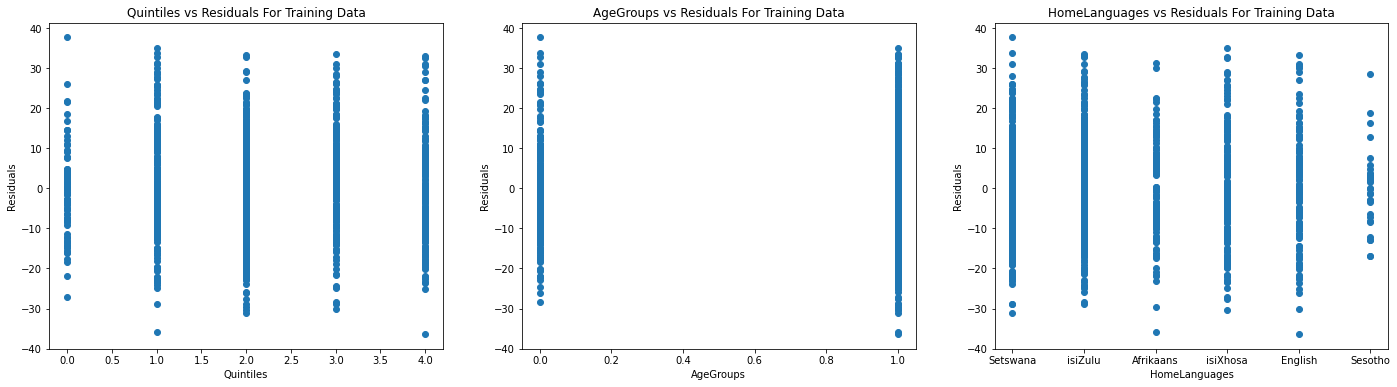

0       0.004279
1       0.004279
2       0.004279
3       0.004279
4       0.004279
          ...   
1050    0.038067
1051    0.038067
1052    0.039763
1053    0.039763
1054    0.039763
Name: hat_diag, Length: 1055, dtype: float64

In [103]:
### TODO: Plot residuals against dependent variables 
plt.figure(figsize=(24,6))
plt.subplot(131)
plt.title('Quintiles vs Residuals For Training Data')
plt.xlabel('Quintiles')
plt.ylabel('Residuals')
plt.scatter(df2016_train.Quintile,residuals)
plt.subplot(132)
plt.title('AgeGroups vs Residuals For Training Data')
plt.xlabel('AgeGroups')
plt.ylabel('Residuals')
plt.scatter(df2016_train.AgeGroup,residuals)
plt.subplot(133)
plt.title('HomeLanguages vs Residuals For Training Data')
plt.xlabel('HomeLanguages')
plt.ylabel('Residuals')
plt.scatter(df2016_HL,residuals)
plt.show()
## check for outliers
influence_points = fitFinal.get_influence().summary_frame().sort_values(by='hat_diag')
influence_points = influence_points.reset_index(drop=True)
display(influence_points.hat_diag)


The above residual analysis was to determine if there is a relationship between the dependent variables in our model above and the residuals, which is highlighted by the above scatterplots. Here we see that there is no clear relationship between any of the explanatory variables and the residuals which allow us to conclude that the regression coefficients represented in the final model above are unbiased.

We secondly used the influence function provided by the statsmodels api in order to determine if there were any outliers in our training data that might have influenced our residuals. We extract the leverage values associated to each data point in our training dataset and sort the values from low leverage to high leverage, the result of this set of steps is the series in the above cell. We can deduce from the series above that there are no leverages for the data points that are abnormally higher than the other leverage values. This indicates that there are no real outliers in our dataset.

The two points highlighted above imply that the final model proposed above actually represents a good model for the question stated above.

We now finally fit the regression model against our test data and make comparisons between the training dataset outcomes and the test dataset outcomes.

In [104]:
fitTest = smf.ols(formula="Total~Quintile+AgeGroup+HomeLanguage_Afrikaans+HomeLanguage_isiZulu+HomeLanguage_isiXhosa+HomeLanguage_Sesotho+HomeLanguage_Setswana",data=df2016_test).fit()

In [105]:
fitTest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     10.52
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.28e-11
Time:                        14:02:12   Log-Likelihood:                -1050.6
No. Observations:                 264   AIC:                             2117.
Df Residuals:                     256   BIC:                             2146.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 47.9342      3.890     12.324      0.000      40.275      55.594
Quintile                   1.0291      0.803      1.282      0.201      -0.552       2.610
AgeGroup                   6.2184      2.265      2.745      0.006       1.758      10.679
HomeLanguage_Afrikaans    -7.9703      3.728     -2.138      0.033     -15.312      -0.629
HomeLanguage_isiZulu      -4.7021      2.751     -1.709      0.089     -10.119       0.715
HomeLanguage_isiXhosa      2.3614      2.995      0.788      0.431      -3.536       8.259
HomeLanguage_Sesotho     -10.4563      6.276     -1.666      0.097     -22.816       1.903
HomeLanguage_Setswana    -11.7755      2.983     -3.947      0.000     -17.651      -5.900
==============================================================================
Omnibus:                        0.403   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.513
Skew:                           0.082   Prob(JB):                        0.774
Kurtosis:                       2.860   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
print(fitTest.params)
print(fitFinal.params)

Intercept                 47.934179
Quintile                   1.029061
AgeGroup                   6.218351
HomeLanguage_Afrikaans    -7.970256
HomeLanguage_isiZulu      -4.702084
HomeLanguage_isiXhosa      2.361397
HomeLanguage_Sesotho     -10.456276
HomeLanguage_Setswana    -11.775473
dtype: float64
Intercept                 42.025290
Quintile                   1.676928
AgeGroup                   6.283709
HomeLanguage_Afrikaans    -4.101789
HomeLanguage_isiZulu       0.340099
HomeLanguage_isiXhosa      3.567875
HomeLanguage_Sesotho      -9.694445
HomeLanguage_Setswana     -4.966028
dtype: float64


Above we have fitted the model against the test data and printed the regression coefficients for both the training and test models.
The following important notes can be extracted from the above regression coefficients.
* AgeGroup seems to have a similar values for both the training and testing model indicating that the approximate value of 6.2 is statistically significant for the regression coefficient relating to Quintiles. This value indicates that a 6.2 change in AgeGroup results in a unit change relating to ELOM score.
* HomeLanguage for each Home Language seems to differ quite a lot between the training regression coefficients and the testing regression coefficients. This indicates that this variable isn't statistically significant and the regression values could be determined by some chance. This could be a result of sampling variation and that this variable doesn't have a strong LINEAR relationship with ELOM score.
* The regression coefficients relating to Quintile has a slight difference in the training and testing dataset. They are quite similar though and indicate that the Quintile variable is statistically significant. 

In the interpretation of results section we will look at comparing the 2016 ELOM score model with the 2019 ELOM score model, the above analysis was just used to analyse the socio-economic variables together with ELOM score in 2016.

## Hypothesis Testing

All statistical tests performed assume random sampling. Tests were conducted at a 5% significance level.

### 1 - Does the socio-economic background of a child influence their ELOM score and, if so, to what extent?

We are performing a permutation test in order to evaluate whether students in certain age groups and quintiles perform better than students in other age groups and quintiles.

**Null hypothesis:** Average ELOM score for students who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) is equal to the average ELOM score for students who are in Quitile 1, 2 or 3 and belong to age group 1 (50 to 59 months).

**Alternative hypothesis:** Average ELOM score for students who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) is greater than the average ELOM score for students who are in Quitile 1, 2 or 3 and belong to age group 1 (50 to 59 months).

$H_0$ : $\mu_1$ = $\mu_2$

$H_1$ : $\mu_1$ $>$ $\mu_2$

We begin by splitting our data into the two samples which we want to look at in order to test our null hypothesis. The first sample is the ELOM scores for students who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months), and the second sample is the ELOM scores for students who are in Quitile 1, 2 or 3 and belong to age group 1 (50 to 59 months).

We then conduct a permutation test on the two samples because we are looking at two samples under different conditions. This returns the t-value and p-value corresponding to this permutation test. 

In [107]:
q1_group1 = df2019[((df2019.Quintile == 4) | (df2019.Quintile == 5)) & (df2019.AgeGroup == "60 to 69")].total
q1_group2 = df2019[((df2019.Quintile == 1) | (df2019.Quintile == 2) | (df2019.Quintile == 3)) & (df2019.AgeGroup == "50 to 59")].total

In [108]:
t_q1, p_q1 = stats.ttest_ind(q1_group1, q1_group2)
print("t = " + str(t_q1))
print("p = " + str(p_q1/2))

t = 14.692279346590094
p = 1.2433154010732775e-42


Given that the p-value of 1.24e-42 is less than 0.05, we reject the null hypothesis. We are 95% confident that the average ELOM score for students who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) is greater than the average ELOM score for students who are in Quitile 1, 2 or 3 and belong to age group 1 (50 to 59 months).

### 2 - In the absence of the socio-economic factors, to what extent do the behavioural tendencies of a child influence ELOM score and whether or not the child is at risk?

Below we perform a proportion test to evaluate whether the proportion of students who are at risk is lower when the `ChildObs` totals are higher. 

**Null Hypothesis:** The proportion of children at risk is the same regardless of the `ChildObs` total.

**Alternative Hypothesis:** The proportion of children at risk is lower if the `ChildObs` total is greater than 6, and the proportion of children at risk is higher if the `ChildObs` total is less than or equal to 6.

$H_0$ : $p_1$ = $p_2$

$H_1$ : $p_1$ $>$ $p_2$

We begin by splitting our data into the two samples which we want to look at in order to test our null hypothesis. The first sample is students whose `ChildObs` total is greater than 6, and the second sample is students whose `ChildObs` total is less than or equal to 6.

We then conduct a proportion test on the two samples in order to assess which proportion of children is more at risk. This returns the t-value and p-value corresponding to this proportion test. 

In [109]:
q2_group1 = df2019[df2019.ChildObs > 6].total
q2_group2 = df2019[df2019.ChildObs <= 6].total

population_mean = df2019.total.mean()
prop_at_risk_group1 = q2_group1[q2_group1 < population_mean].shape[0]
prop_at_risk_group2 = q2_group2[q2_group2 < population_mean].shape[0]

prop_at_risk = df2019[df2019.total < population_mean].shape[0] / df2019.size

In [110]:
from statsmodels.stats.proportion import proportions_ztest

counts = np.array([prop_at_risk_group1, prop_at_risk_group2])
nobs = np.array([q2_group1.shape[0], q2_group2.shape[0]])

zscore, pvalue = proportions_ztest(counts, nobs, alternative = 'smaller')
print("z =", zscore)
print("p =", pvalue)

z = -18.29496417891383
p = 4.538037916044111e-75


Give that the p-value of 4.54e-75 is less than 0.05, we reject the null hypothesis. We are 95% confident that the proportion of children at risk is lower if the `ChildObs` total is greater than 6, and the proportion of children at risk is higher if the `ChildObs` total is less than or equal to 6.

### 3 - In conjunction with the socio-economic background of a child, do the behavioural tendencies of the child have an influence on the ELOM score?

We are performing a permutation test in order to evaluate whether students who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) are more at risk when the `ChildObs` totals are higher.

**Null hypothesis:** The risk is the same for students who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) regardless of the `ChildObs` total.

**Alternative hypothesis:** Students who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) and have a `ChildObs` score less than or equal to 6 are more at risk than students with the same socio-economic background and a `ChildObs` score greater than 6.

$H_0$ : $\mu_1$ = $\mu_2$

$H_1$ : $\mu_1$ $>$ $\mu_2$

We begin by splitting our data into the two samples which we want to look at in order to test our null hypothesis. $\mu_1$ refers to the average ELOM score of students with `ChildObs` being greater than 6, and $\mu_2$ refers to the average ELOM score of students with `ChildObs` being less than or equal to 6.

We then conduct a permutation test on the two samples because we are looking at two samples under different conditions. This returns the t-value and p-value corresponding to this permutation test. 

In [114]:
q3_group1 = df2019[((df2019.Quintile == 4) | (df2019.Quintile == 5)) & (df2019.AgeGroup == "60 to 69") & (df2019.ChildObs > 6)].total
q3_group2 = df2019[((df2019.Quintile == 4) | (df2019.Quintile == 5)) & (df2019.AgeGroup == "60 to 69") & (df2019.ChildObs <= 6)].total

In [115]:
t_q3, p_q3 = stats.ttest_ind(q3_group1, q3_group2)
print("t = " + str(t_q3))
print("p = " + str(p_q3/2))

t = 9.952996017857597
p = 2.1187551952696196e-21


Given that the p-value is less than 0.05, we reject the null hypothesis. We are 95% confident that students who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) and have a `ChildObs` score less than or equal to 6 are more at risk than students with the same socio-economic background and a `ChildObs` score greater than 6.

### 4 - Considering the 2016 dataset, to what extent do the socio-economic factors influence ELOM score and how does this compare to 2019?

We are performing a permutation test in order to evaluate whether students in 2016 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) performed differently to students in 2019 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months).

**Null hypothesis:** The average ELOM score for students in 2016 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) is the same as the average ELOM score for students in 2019 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months).

**Alternative hypothesis:** The average ELOM score for students in 2016 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) is less than the average ELOM score for students in 2019 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months).

$H_0$ : $\mu_1$ = $\mu_2$

$H_1$ : $\mu_1$ $>$ $\mu_2$

We begin by splitting our data into the two samples which we want to look at in order to test our null hypothesis. The first sample is the ELOM scores for students in 2016 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months), and the second sample is the ELOM scores for students in 2019 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months).

We then conduct a permutation test on the two samples because we are looking at two samples under different conditions. This returns the t-value and p-value corresponding to this permutation test. 

In [111]:
q4_group1 = df2016[((df2016.Quintile == 4) | (df2016.Quintile == 5)) & (df2016.AgeGroup == "60 to 69 Months")].Total
q4_group2 = df2019[((df2019.Quintile == 4) | (df2019.Quintile == 5)) & (df2019.AgeGroup == "60 to 69")].total

In [112]:
t_q4, p_q4 = stats.ttest_ind(q4_group1, q4_group2)
print("t = " + str(t_q4))
print("p = " + str(p_q4/2))

t = -9.173461994060665
p = 1.949345675293271e-19


Given that the p-value of 1.95e-19 is less than 0.05, we reject the null hypothesis. We are 95% confident that the average ELOM score for students in 2016 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months) is less than the average ELOM score for students in 2019 who are in Quintile 4 or 5 and belong to age group 2 (60 to 69 months).